In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

from matplotlib.dates import DateFormatter

billboard_hot_100 = pd.read_csv("billboard_hot_100.csv")
billboard_hot_100["first_day_of_the_week"] = pd.to_datetime(billboard_hot_100["first_day_of_the_week"],
                                                            infer_datetime_format=True)

In [2]:
billboard_hot_100.dtypes

Unnamed: 0                        int64
first_day_of_the_week    datetime64[ns]
artist                           object
song_name                        object
position                          int64
last_week_position              float64
peak_position                     int64
weeks_on_chart                    int64
songwriters                      object
producers                        object
promotion_label                  object
dtype: object

In [3]:
billboard_hot_100["year"] = billboard_hot_100["first_day_of_the_week"].dt.year

billboard_hot_100.head()

Unnamed: 0 first_day_of_the_week                         artist  \
0           0            1958-09-08               Domenico Modugno   
1           1            1958-09-08                   The Elegants   
2           2            1958-09-08            The Everly Brothers   
3           3            1958-09-08  Jimmy Clanton And His Rockets   
4           4            1958-09-08  Perez Prado And His Orchestra   

                         song_name  position  last_week_position  \
0  Nel Blu Dipinto Di Blu (Volare)         1                 1.0   
1                      Little Star         2                 2.0   
2                         Bird Dog         3                 3.0   
3                     Just A Dream         4                 4.0   
4                         Patricia         5                 6.0   

   peak_position  weeks_on_chart             songwriters   producers  \
0              1               6  F.Migliacci, D.Modugno  Not Listed   
1              1               6      V.Picone, A.Venosa  Not Listed   
2              3               6                B.Bryant  Not Listed   
3              4               6              Not Listed  Not Listed   
4              2               6       B.Marcus, P.Prado  Not Listed   

  promotion_label  year  
0           Decca  1958  
1             Apt  1958  
2         Cadence  1958  
3             Ace  1958  
4      RCA Victor  1958

In [4]:
# Spotify creation date
spotify_creation_date = pd.to_datetime("2008-01-01", infer_datetime_format=True)

# Youtube creation date
youtube_creation_date = pd.to_datetime("2005-02-14", infer_datetime_format=True)

# Apple music creation date
apple_music_creation_date = pd.to_datetime("2015-06-30", infer_datetime_format=True)

# MTV Launch date
mtv_launch_date = pd.to_datetime("1981-08-01", infer_datetime_format=True)

## Song lifetime on chart

### By week

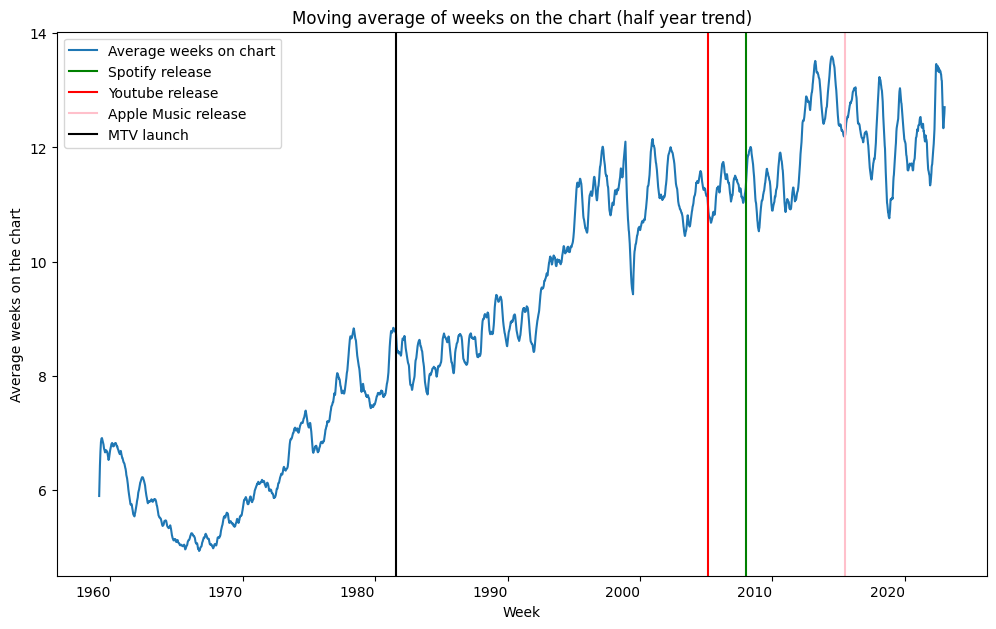

In [5]:
import matplotlib.dates as mdates

avg_weeks_on_chart = billboard_hot_100[["first_day_of_the_week", "weeks_on_chart"]].groupby(
    by="first_day_of_the_week").mean().rolling(window=30).mean()

avg_weeks_on_chart_plot = avg_weeks_on_chart.plot(kind='line', figsize=(12, 8), legend=False, rot=0)
avg_weeks_on_chart_plot.axvline(x = spotify_creation_date, color = 'green')
avg_weeks_on_chart_plot.axvline(x = youtube_creation_date, color = 'red')
avg_weeks_on_chart_plot.axvline(x = apple_music_creation_date, color = 'pink')
avg_weeks_on_chart_plot.axvline(x = mtv_launch_date, color = 'black')
plt.title("Moving average of weeks on the chart (half year trend)")
plt.xlabel("Week")
plt.ylabel("Average weeks on the chart")
plt.legend(["Average weeks on chart", "Spotify release", "Youtube release", "Apple Music release", "MTV launch"])

plt.savefig("figures/average_weeks_on_chart.pdf", format="pdf")#, bbox_inches="tight")
plt.show()

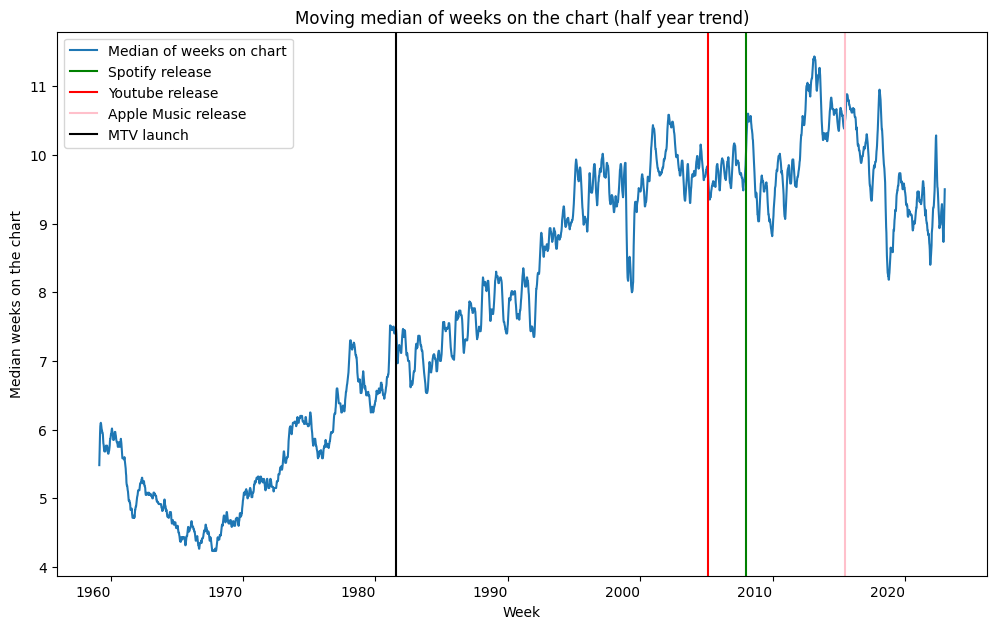

In [6]:
median_weeks_on_chart = billboard_hot_100[["first_day_of_the_week", "weeks_on_chart"]].groupby(
    by="first_day_of_the_week").median().rolling(window=30).mean()

median_weeks_on_chart_plot = median_weeks_on_chart.plot(kind='line', figsize=(12, 8), legend=False, rot=0)
median_weeks_on_chart_plot.axvline(x = spotify_creation_date, color = 'green')
median_weeks_on_chart_plot.axvline(x = youtube_creation_date, color = 'red')
median_weeks_on_chart_plot.axvline(x = apple_music_creation_date, color = 'pink')
median_weeks_on_chart_plot.axvline(x = mtv_launch_date, color = 'black')
plt.title("Moving median of weeks on the chart (half year trend)")
plt.xlabel("Week")
plt.ylabel("Median weeks on the chart")
plt.legend(["Median of weeks on chart", "Spotify release", "Youtube release", "Apple Music release", "MTV launch"])

plt.savefig("figures/median_weeks_on_chart.pdf", format="pdf")
plt.show()

### By year

In [7]:
avg_week_on_chart_yearly = billboard_hot_100[["weeks_on_chart", "year"]].groupby(by="year").mean()

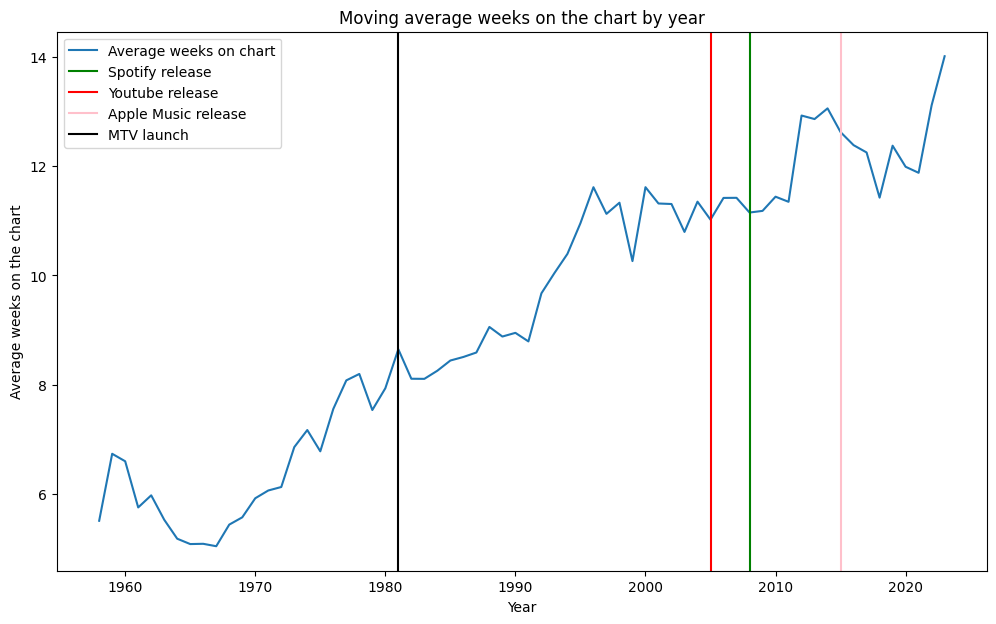

In [8]:
avg_weeks_on_chart_plot_yearly = avg_week_on_chart_yearly.plot(kind='line', figsize=(12, 7), legend=False)
avg_weeks_on_chart_plot_yearly.axvline(x = spotify_creation_date.year, color = 'green')
avg_weeks_on_chart_plot_yearly.axvline(x = youtube_creation_date.year, color = 'red')
avg_weeks_on_chart_plot_yearly.axvline(x = apple_music_creation_date.year, color = 'pink')
avg_weeks_on_chart_plot_yearly.axvline(x = mtv_launch_date.year, color = 'black')

plt.title("Moving average weeks on the chart by year")
plt.xlabel("Year")
plt.ylabel("Average weeks on the chart")
plt.legend(["Average weeks on chart", "Spotify release", "Youtube release", "Apple Music release", "MTV launch"])

plt.savefig("figures/average_weeks_on_chart_yearly.pdf", format="pdf")
plt.show()

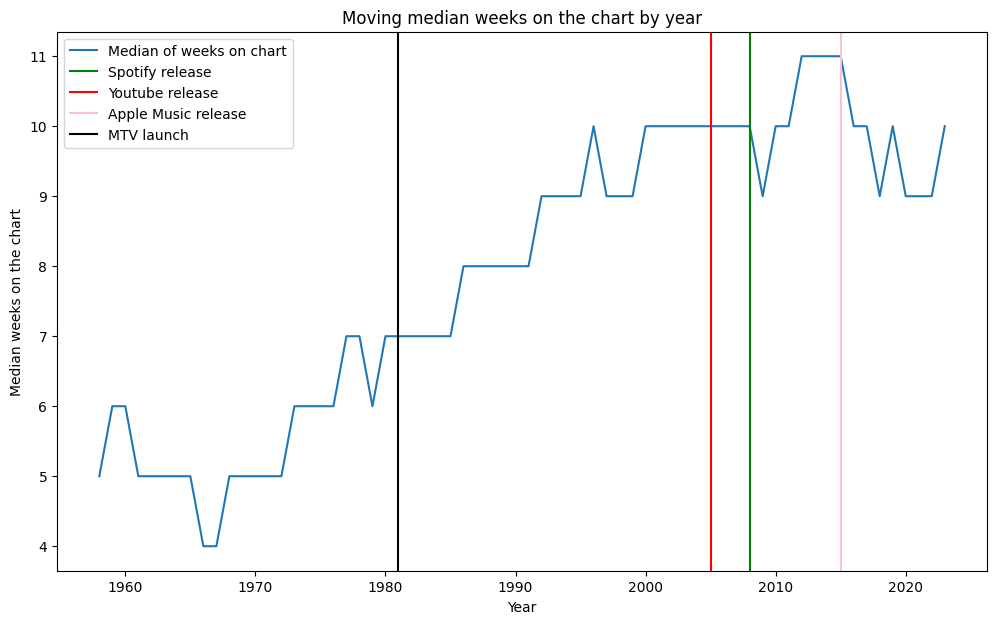

In [9]:
median_weeks_on_chart_yearly = billboard_hot_100[["weeks_on_chart", "year"]].groupby(by="year").median()

median_weeks_on_chart_plot_yearly = median_weeks_on_chart_yearly.plot(kind='line', figsize=(12, 7), legend=False)
median_weeks_on_chart_plot_yearly.axvline(x = spotify_creation_date.year, color = 'green')
median_weeks_on_chart_plot_yearly.axvline(x = youtube_creation_date.year, color = 'red')
median_weeks_on_chart_plot_yearly.axvline(x = apple_music_creation_date.year, color = 'pink')
median_weeks_on_chart_plot_yearly.axvline(x = mtv_launch_date.year, color = 'black')

plt.title("Moving median weeks on the chart by year")
plt.xlabel("Year")
plt.ylabel("Median weeks on the chart")
plt.legend(["Median of weeks on chart", "Spotify release", "Youtube release", "Apple Music release", "MTV launch"])

plt.savefig("figures/median_weeks_on_chart_yearly.pdf", format="pdf")
plt.show()

### Seasonal

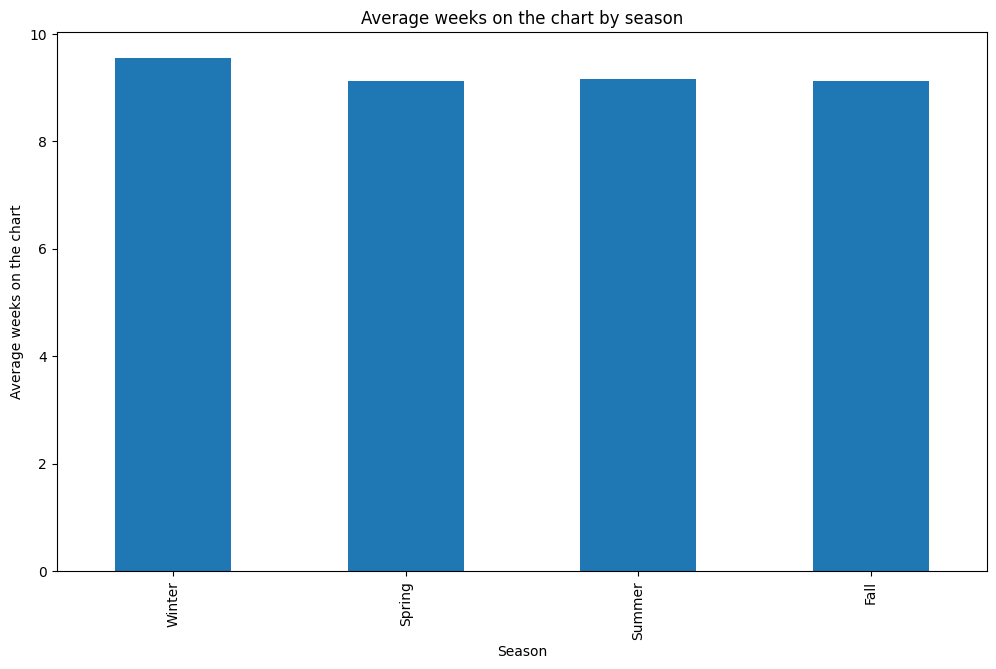

In [10]:
billboard_hot_100["season"] = billboard_hot_100["first_day_of_the_week"].dt.month % 12 // 3 + 1

avg_weeks_on_chart_season = billboard_hot_100[["season", "weeks_on_chart"]].groupby(by="season").mean()

avg_weeks_on_chart_plot_season = avg_weeks_on_chart_season.plot(kind='bar', figsize=(12, 7), legend=False)

plt.title("Average weeks on the chart by season")
plt.xlabel("Season")
plt.ylabel("Average weeks on the chart")
plt.xticks(ticks=range(0, 4), labels=["Winter", "Spring", "Summer", "Fall"])

plt.savefig("figures/average_weeks_on_chart_season.pdf", format="pdf")
plt.show()

### Top 20 weekly

In [11]:
top_20_weekly = billboard_hot_100[["first_day_of_the_week",
                                   "position", "weeks_on_chart"]][billboard_hot_100["position"] <= 20].sort_values(by=[
                                                                "first_day_of_the_week", "weeks_on_chart"]).groupby(
                                                                by=["first_day_of_the_week"]).head(20)

In [12]:
top_10_weekly = billboard_hot_100[["first_day_of_the_week",
                                    "position", "weeks_on_chart"]][billboard_hot_100["position"] <= 10].sort_values(by=[
                                                                  "first_day_of_the_week", "weeks_on_chart"]).groupby(
                                                                   by=["first_day_of_the_week"]).head(10)


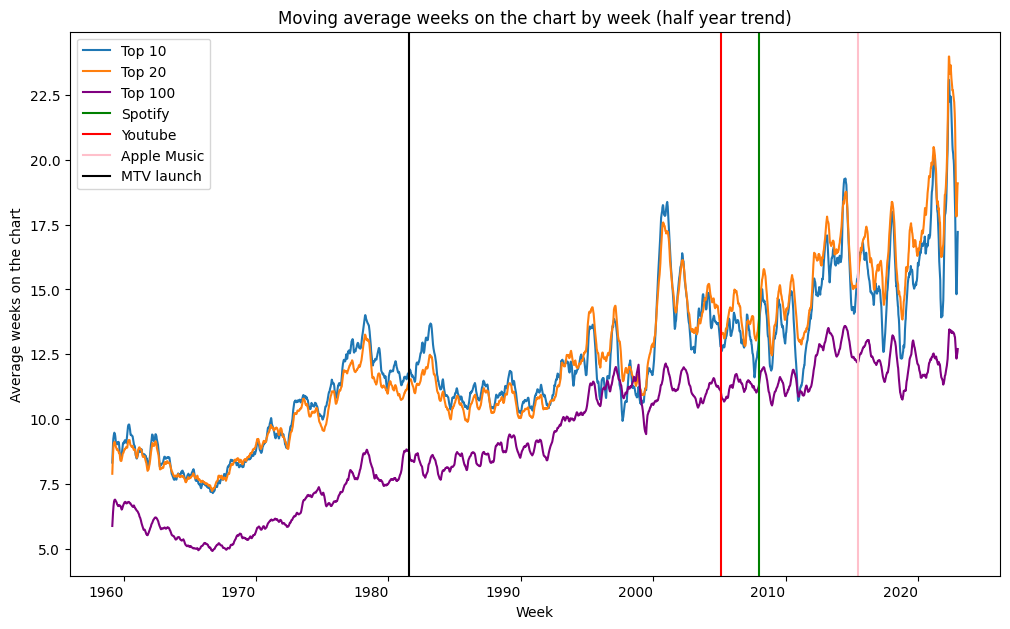

In [13]:
top_20_on_chart_avg = top_20_weekly[["first_day_of_the_week", "weeks_on_chart"]].groupby(
    by="first_day_of_the_week").mean().rolling(window=30).mean()

top_10_on_chart_avg = top_10_weekly[["first_day_of_the_week", "weeks_on_chart"]].groupby(
    by="first_day_of_the_week").mean().rolling(window=30).mean()

top_10_on_chart_avg_plot = top_10_on_chart_avg.plot(kind='line', figsize=(12, 8), legend=False, rot=0)
top_20_on_chart_avg_plot = top_20_on_chart_avg.plot(kind='line', figsize=(12, 8), legend=False, rot=0, ax=top_10_on_chart_avg_plot)
avg_weeks_on_chart.plot(kind='line', figsize=(12, 8), legend=False, rot=0, ax=top_10_on_chart_avg_plot, color="purple")

top_10_on_chart_avg_plot.axvline(x = spotify_creation_date, color = 'green')
top_10_on_chart_avg_plot.axvline(x = youtube_creation_date, color = 'red')
top_10_on_chart_avg_plot.axvline(x = apple_music_creation_date, color = 'pink')
top_10_on_chart_avg_plot.axvline(x = mtv_launch_date, color = 'black')

plt.title("Moving average weeks on the chart by week (half year trend)")
plt.xlabel("Week")
plt.ylabel("Average weeks on the chart")
plt.legend(["Top 10", "Top 20", "Top 100", "Spotify", "Youtube", "Apple Music", "MTV launch"])

plt.savefig("figures/average_weeks_on_chart_20_100.pdf", format="pdf")
plt.show()

### Top 20 median weekly

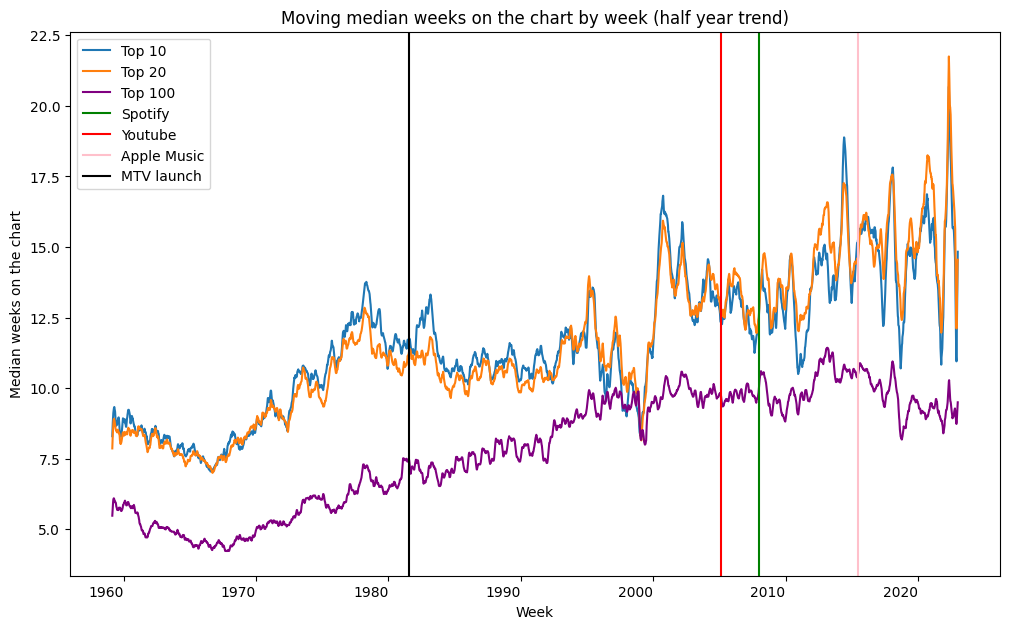

In [14]:
top_20_on_chart_median = top_20_weekly[["first_day_of_the_week", "weeks_on_chart"]].groupby(
    by="first_day_of_the_week").median().rolling(window=30).mean()

top_10_on_chart_median = top_10_weekly[["first_day_of_the_week", "weeks_on_chart"]].groupby(
    by="first_day_of_the_week").median().rolling(window=30).mean()

top_10_on_chart_median_plot = top_10_on_chart_median.plot(kind='line', figsize=(12, 8), legend=False, rot=0)
top_20_on_chart_median_plot = top_20_on_chart_median.plot(kind='line', figsize=(12, 8), legend=False, rot=0, ax=top_10_on_chart_median_plot)
median_weeks_on_chart.plot(kind='line', figsize=(12, 8), legend=False, rot=0, ax=top_10_on_chart_median_plot, color="purple")

top_10_on_chart_median_plot.axvline(x = spotify_creation_date, color = 'green')
top_10_on_chart_median_plot.axvline(x = youtube_creation_date, color = 'red')
top_10_on_chart_median_plot.axvline(x = apple_music_creation_date, color = 'pink')
top_10_on_chart_median_plot.axvline(x = mtv_launch_date, color = 'black')

plt.title("Moving median weeks on the chart by week (half year trend)")
plt.xlabel("Week")
plt.ylabel("Median weeks on the chart")
plt.legend(["Top 10", "Top 20", "Top 100", "Spotify", "Youtube", "Apple Music", "MTV launch"])

plt.savefig("figures/median_weeks_on_chart_20_100.pdf", format="pdf")
plt.show()

## Distribution of lifetime of the songs

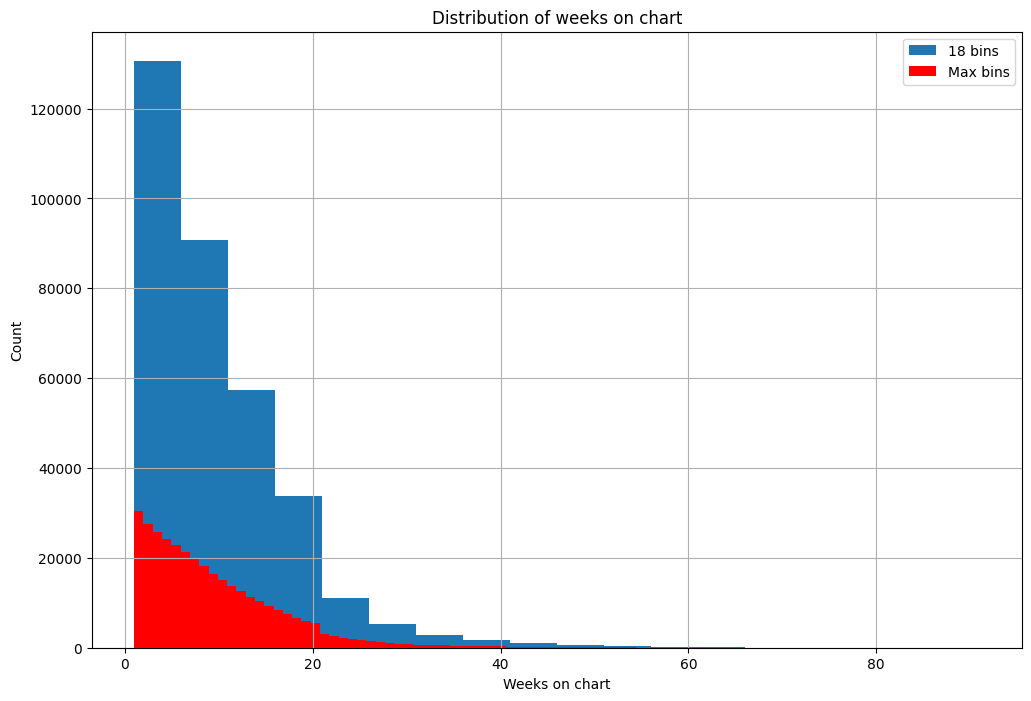

In [15]:
weeks_on_chart_counts = billboard_hot_100["weeks_on_chart"]

# choosing bin size: https://en.wikipedia.org/wiki/Histogram#Number_of_bins_and_width
weeks_on_chart_counts.hist(bins=18, figsize=(12, 8), legend=False)
weeks_on_chart_counts.hist(bins=billboard_hot_100["weeks_on_chart"].max(), figsize=(12, 8), legend=False, color="red")

plt.title("Distribution of weeks on chart")
plt.xlabel("Weeks on chart")
plt.ylabel("Count")
plt.legend(["18 bins", "Max bins"])

plt.savefig("figures/lifetime_of_songs_distribution.pdf", format="pdf")
plt.show()

### Bin size == max weeks on chart

In [16]:
# weeks_on_chart_counts.hist(bins=billboard_hot_100["weeks_on_chart"].max(), figsize=(12, 8), legend=False)

# plt.title("Distribution of weeks on chart")
# plt.xlabel("Weeks on chart")
# plt.ylabel("Count")

# plt.savefig("figures/lifetime_of_songs_distribution_more_bins.pdf", format="pdf")
# plt.show()

### Distribution for max weeks on the chart

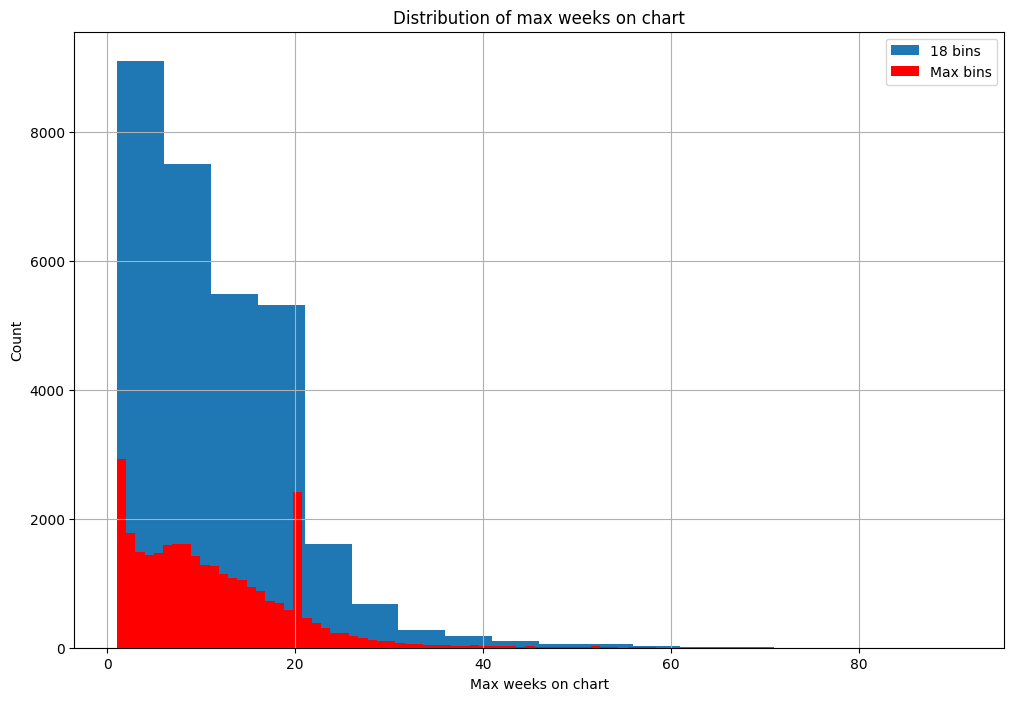

In [17]:
max_weeks_on_chart = billboard_hot_100[["artist", "song_name", "weeks_on_chart"]].groupby(
    by=["artist", "song_name"]).max().reset_index()

max_weeks_on_chart_ax = max_weeks_on_chart.hist(bins=18, figsize=(12, 8), legend=False)
max_weeks_on_chart.hist(bins=billboard_hot_100["weeks_on_chart"].max(), figsize=(12, 8), legend=False, color="red", ax=max_weeks_on_chart_ax)

plt.title("Distribution of max weeks on chart")
plt.xlabel("Max weeks on chart")
plt.ylabel("Count")
plt.legend(["18 bins", "Max bins"])

plt.savefig("figures/max_weeks_on_chart_distribution.pdf", format="pdf")
plt.show()

### Bin size == max weeks on chart

In [18]:
# max_weeks_on_chart.hist(bins=billboard_hot_100["weeks_on_chart"].max(), figsize=(12, 8), legend=False)

# plt.title("Distribution of max weeks on chart")
# plt.xlabel("Max weeks on chart")
# plt.ylabel("Count")

# plt.savefig("figures/max_weeks_on_chart_distribution_more_bins.pdf", format="pdf")
# plt.show()

## New songs on the charts

### By week

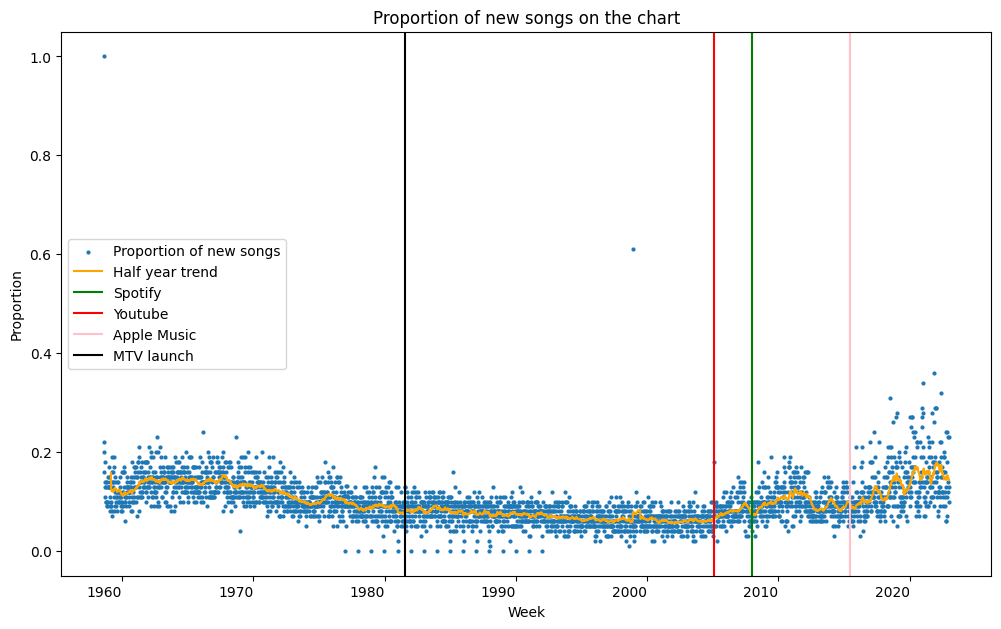

In [19]:
billboard_hot_100["new_song"] = billboard_hot_100["last_week_position"].map(
    lambda position: True if np.isnan(position) else False)

cross_tab_songs = billboard_hot_100[["first_day_of_the_week", "new_song"]].groupby(
    by="first_day_of_the_week").mean().reset_index()
cross_tab_songs_mean = billboard_hot_100[["first_day_of_the_week", "new_song"]].groupby(
    by="first_day_of_the_week").mean().rolling(window=30).mean()
cross_tab_songs_plot = cross_tab_songs.plot(kind="scatter", figsize=(12, 8), legend=False, rot=0, x="first_day_of_the_week", y="new_song", s=4)
cross_tab_songs_mean.plot(kind="line", figsize=(12, 8), legend=False, rot=0, ax=cross_tab_songs_plot, color="orange")

cross_tab_songs_plot.axvline(x = spotify_creation_date, color = 'green')
cross_tab_songs_plot.axvline(x = youtube_creation_date, color = 'red')
cross_tab_songs_plot.axvline(x = apple_music_creation_date, color = 'pink')
cross_tab_songs_plot.axvline(x = mtv_launch_date, color = 'black')

plt.title("Proportion of new songs on the chart")
plt.xlabel("Week")
plt.ylabel("Proportion")
plt.legend(["Proportion of new songs", "Half year trend", "Spotify", "Youtube", "Apple Music", "MTV launch"])

plt.savefig("figures/proportion_of_new_songs.pdf", format="pdf")
plt.show()

### By season

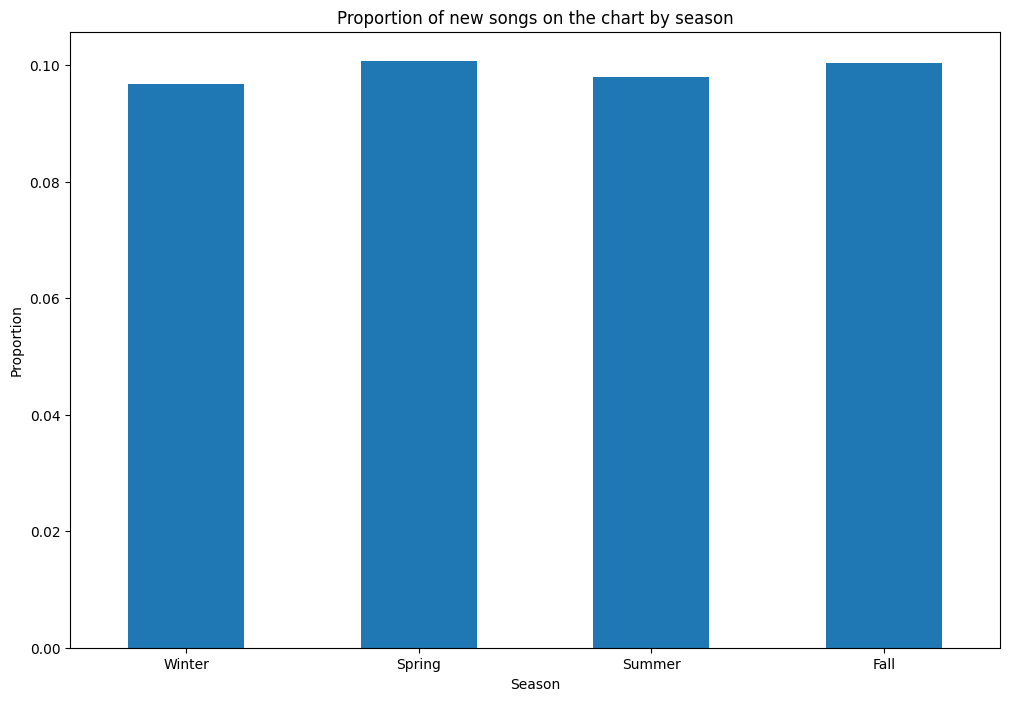

In [20]:
cross_tab_songs_season = billboard_hot_100[["season", "new_song"]].groupby(by="season").mean().reset_index()
cross_tab_songs_season.plot(kind="bar", figsize=(12, 8), legend=False, rot=0, x="season", y="new_song")

plt.title("Proportion of new songs on the chart by season")
plt.xlabel("Season")
plt.ylabel("Proportion")
plt.xticks([0, 1, 2, 3], ["Winter", "Spring", "Summer", "Fall"])

plt.savefig("figures/proportion_of_new_songs_by_season.pdf", format="pdf")
plt.show()

### By year

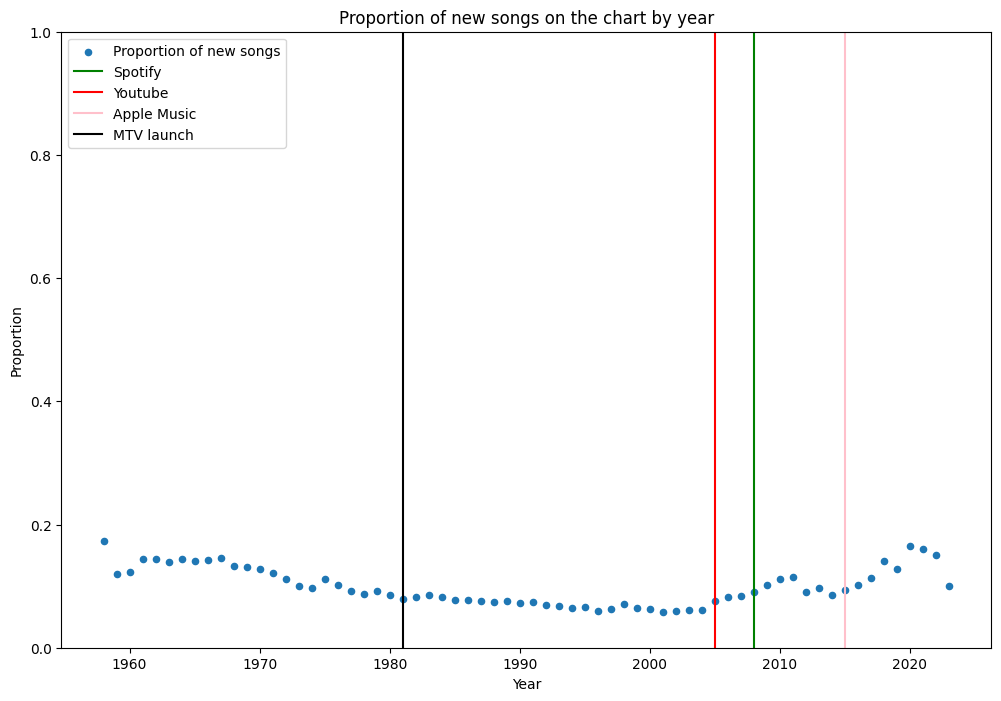

In [21]:
cross_tab_songs_yearly = billboard_hot_100[["year", "new_song"]].groupby(by="year").mean().reset_index()
cross_tab_songs_yearly_ax = cross_tab_songs_yearly.plot(kind="scatter", figsize=(12, 8), legend=False, rot=0, x="year", y="new_song")

cross_tab_songs_yearly_ax.axvline(x = spotify_creation_date.year, color = 'green')
cross_tab_songs_yearly_ax.axvline(x = youtube_creation_date.year, color = 'red')
cross_tab_songs_yearly_ax.axvline(x = apple_music_creation_date.year, color = 'pink')
cross_tab_songs_yearly_ax.axvline(x = mtv_launch_date.year, color = 'black')

plt.title("Proportion of new songs on the chart by year")
plt.xlabel("Year")
plt.ylabel("Proportion")
plt.ylim([0, 1])
plt.legend(["Proportion of new songs", "Spotify", "Youtube", "Apple Music", "MTV launch"])

plt.savefig("figures/proportion_of_new_songs_yearly.pdf", format="pdf")
plt.show()

## Weekly differences in positions

In [22]:
def calculate_position_change(position, last_week_position):
    if np.isnan(last_week_position):
        return 0
    if position > last_week_position:
        return 1
    return 0

billboard_hot_100["position_rised"] = billboard_hot_100.apply(
    lambda x: calculate_position_change(x["position"], x["last_week_position"]), axis=1)

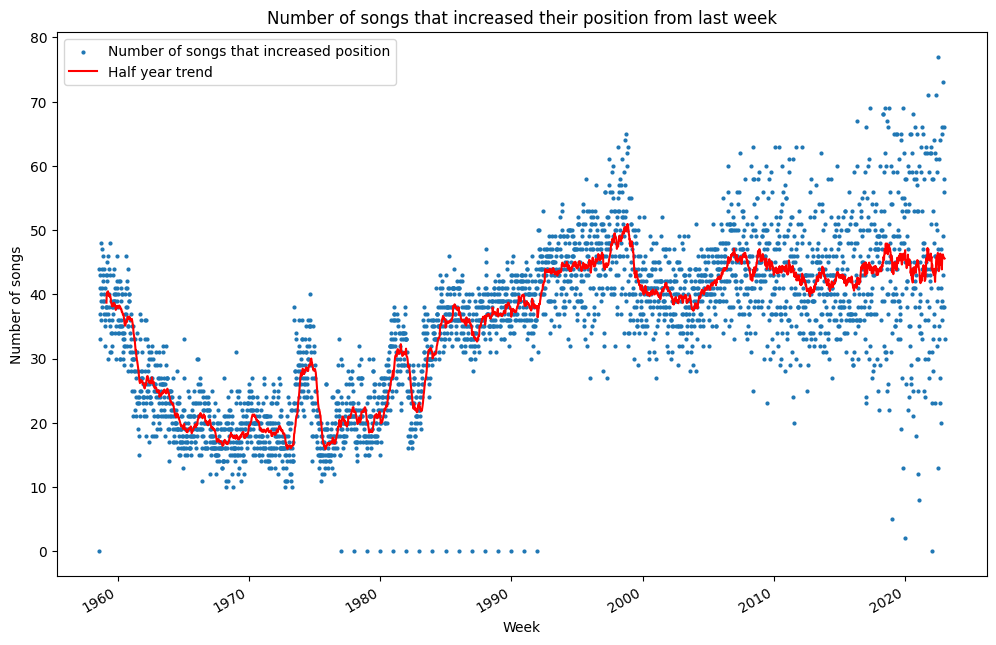

In [23]:
count_rises = billboard_hot_100[["position_rised", "first_day_of_the_week"]].groupby(
    by="first_day_of_the_week").sum().reset_index()
count_rises_trend = billboard_hot_100[["position_rised", "first_day_of_the_week"]].groupby(
    by="first_day_of_the_week").sum().rolling(window=30).mean()

count_rises_ax = count_rises.plot(kind="scatter", figsize=(12, 8), x="first_day_of_the_week", y="position_rised", s=4)
count_rises_trend.plot(kind="line", figsize=(12, 8), ax=count_rises_ax, color="red", legend=False)

plt.title("Number of songs that increased their position from last week")
plt.xlabel("Week")
plt.ylabel("Number of songs")
plt.legend(["Number of songs that increased position", "Half year trend"])

plt.savefig("figures/number_of_songs_rised.pdf", format="pdf")
plt.show()

In [24]:
def calculate_position_difference(position, last_week_position):
    if np.isnan(last_week_position):
        return 100 - position
    return last_week_position - position

billboard_hot_100["position_change"] = billboard_hot_100.apply(
    lambda x: calculate_position_difference(x["position"], x["last_week_position"]), axis=1)

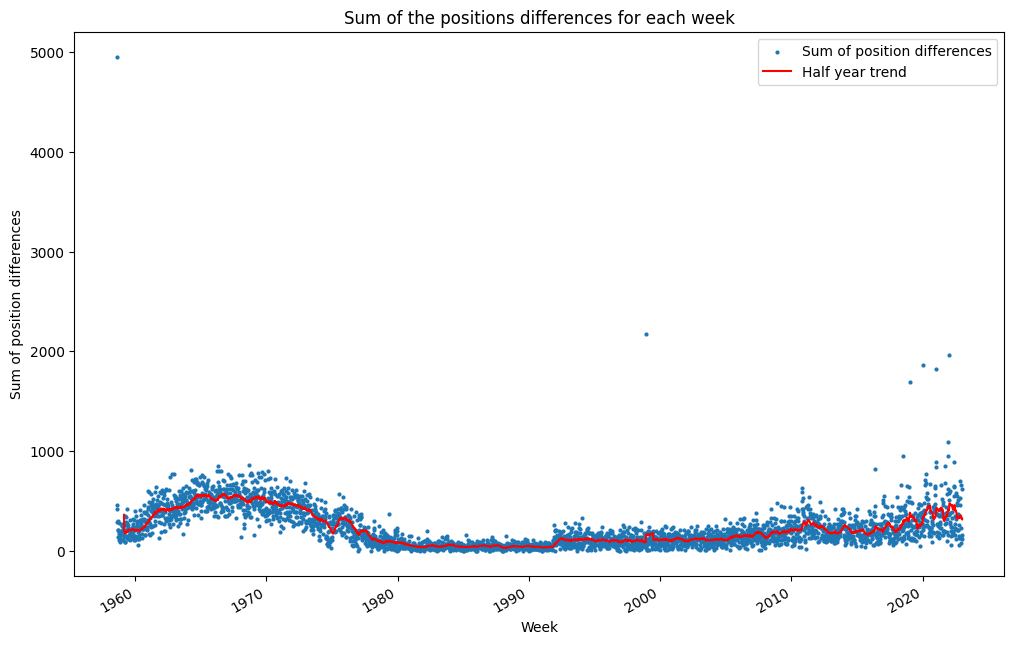

In [25]:
sum_changes = billboard_hot_100[["position_change", "first_day_of_the_week"]].groupby(
    by="first_day_of_the_week").sum().reset_index()
sum_changes_trend = billboard_hot_100[["position_change", "first_day_of_the_week"]].groupby(
    by="first_day_of_the_week").sum().rolling(window=30).mean()

sum_changes_ax = sum_changes.plot(kind='scatter', figsize=(12, 8), legend=False, rot=0, x="first_day_of_the_week", y="position_change", s=4)
sum_changes_trend.plot(kind="line", figsize=(12, 8), ax=sum_changes_ax, color="red", legend=False)

plt.title("Sum of the positions differences for each week")
plt.xlabel("Week")
plt.ylabel("Sum of position differences")
plt.legend(["Sum of position differences", "Half year trend"])

plt.savefig("figures/sum_of_position_changes.pdf", format="pdf")
plt.show()

## Positions difference distributions

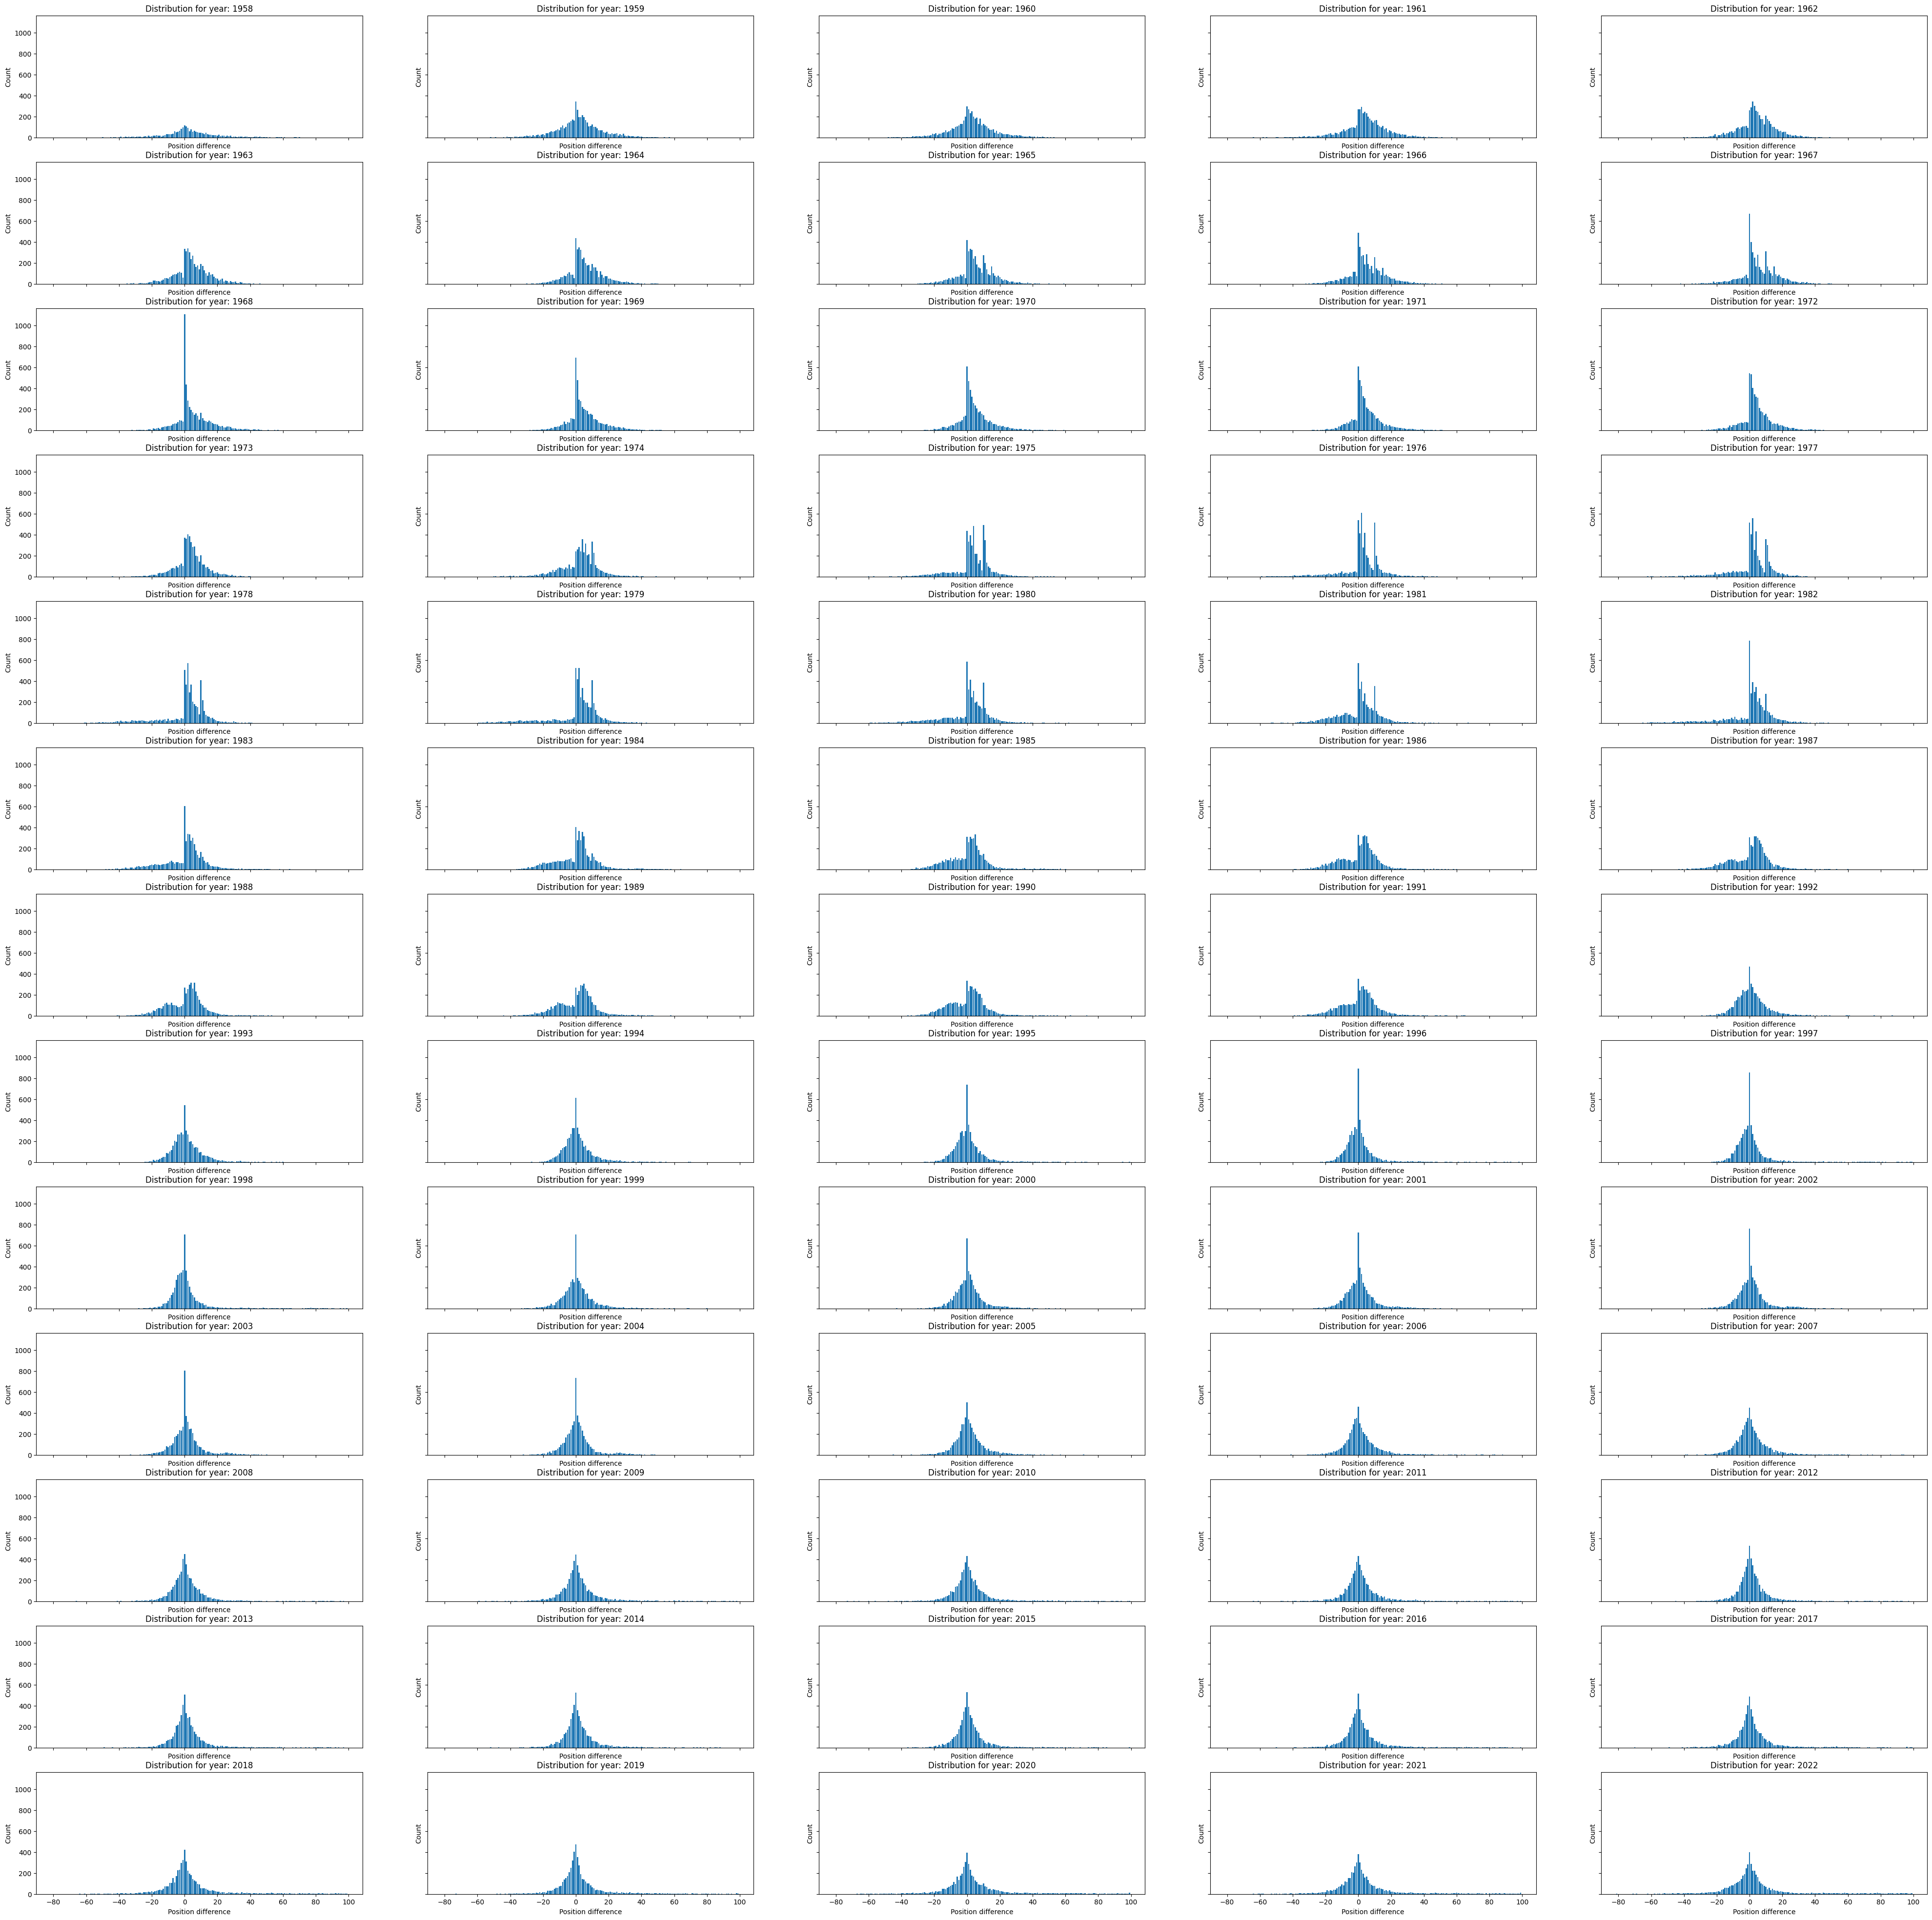

In [26]:
fig, axes = plt.subplots(13, 5, figsize=(50, 50), sharex=True, sharey=True)

row = 0
col = 0
for year in range(1958, 2023):
    count_changes = billboard_hot_100[billboard_hot_100["year"] == year]["position_change"].value_counts().sort_index()
    #count_changes.plot(kind='bar', legend=False, rot=0, ax=axes[row, col], ec='blue')
    axes[row, col].bar(count_changes.index, count_changes.values)
    axes[row, col].set_title(f"Distribution for year: {year}")
    axes[row, col].set_xlabel("Position difference")
    axes[row, col].set_ylabel("Count")
    axes[row, col].xaxis.set_major_locator(plt.MaxNLocator(10))
    col += 1
    if col == 5:
        col = 0
        row += 1

plt.locator_params(axis='x', nbins=10)

plt.savefig("figures/position_difference_distribution.pdf", format="pdf")
plt.show()

### Heatmap

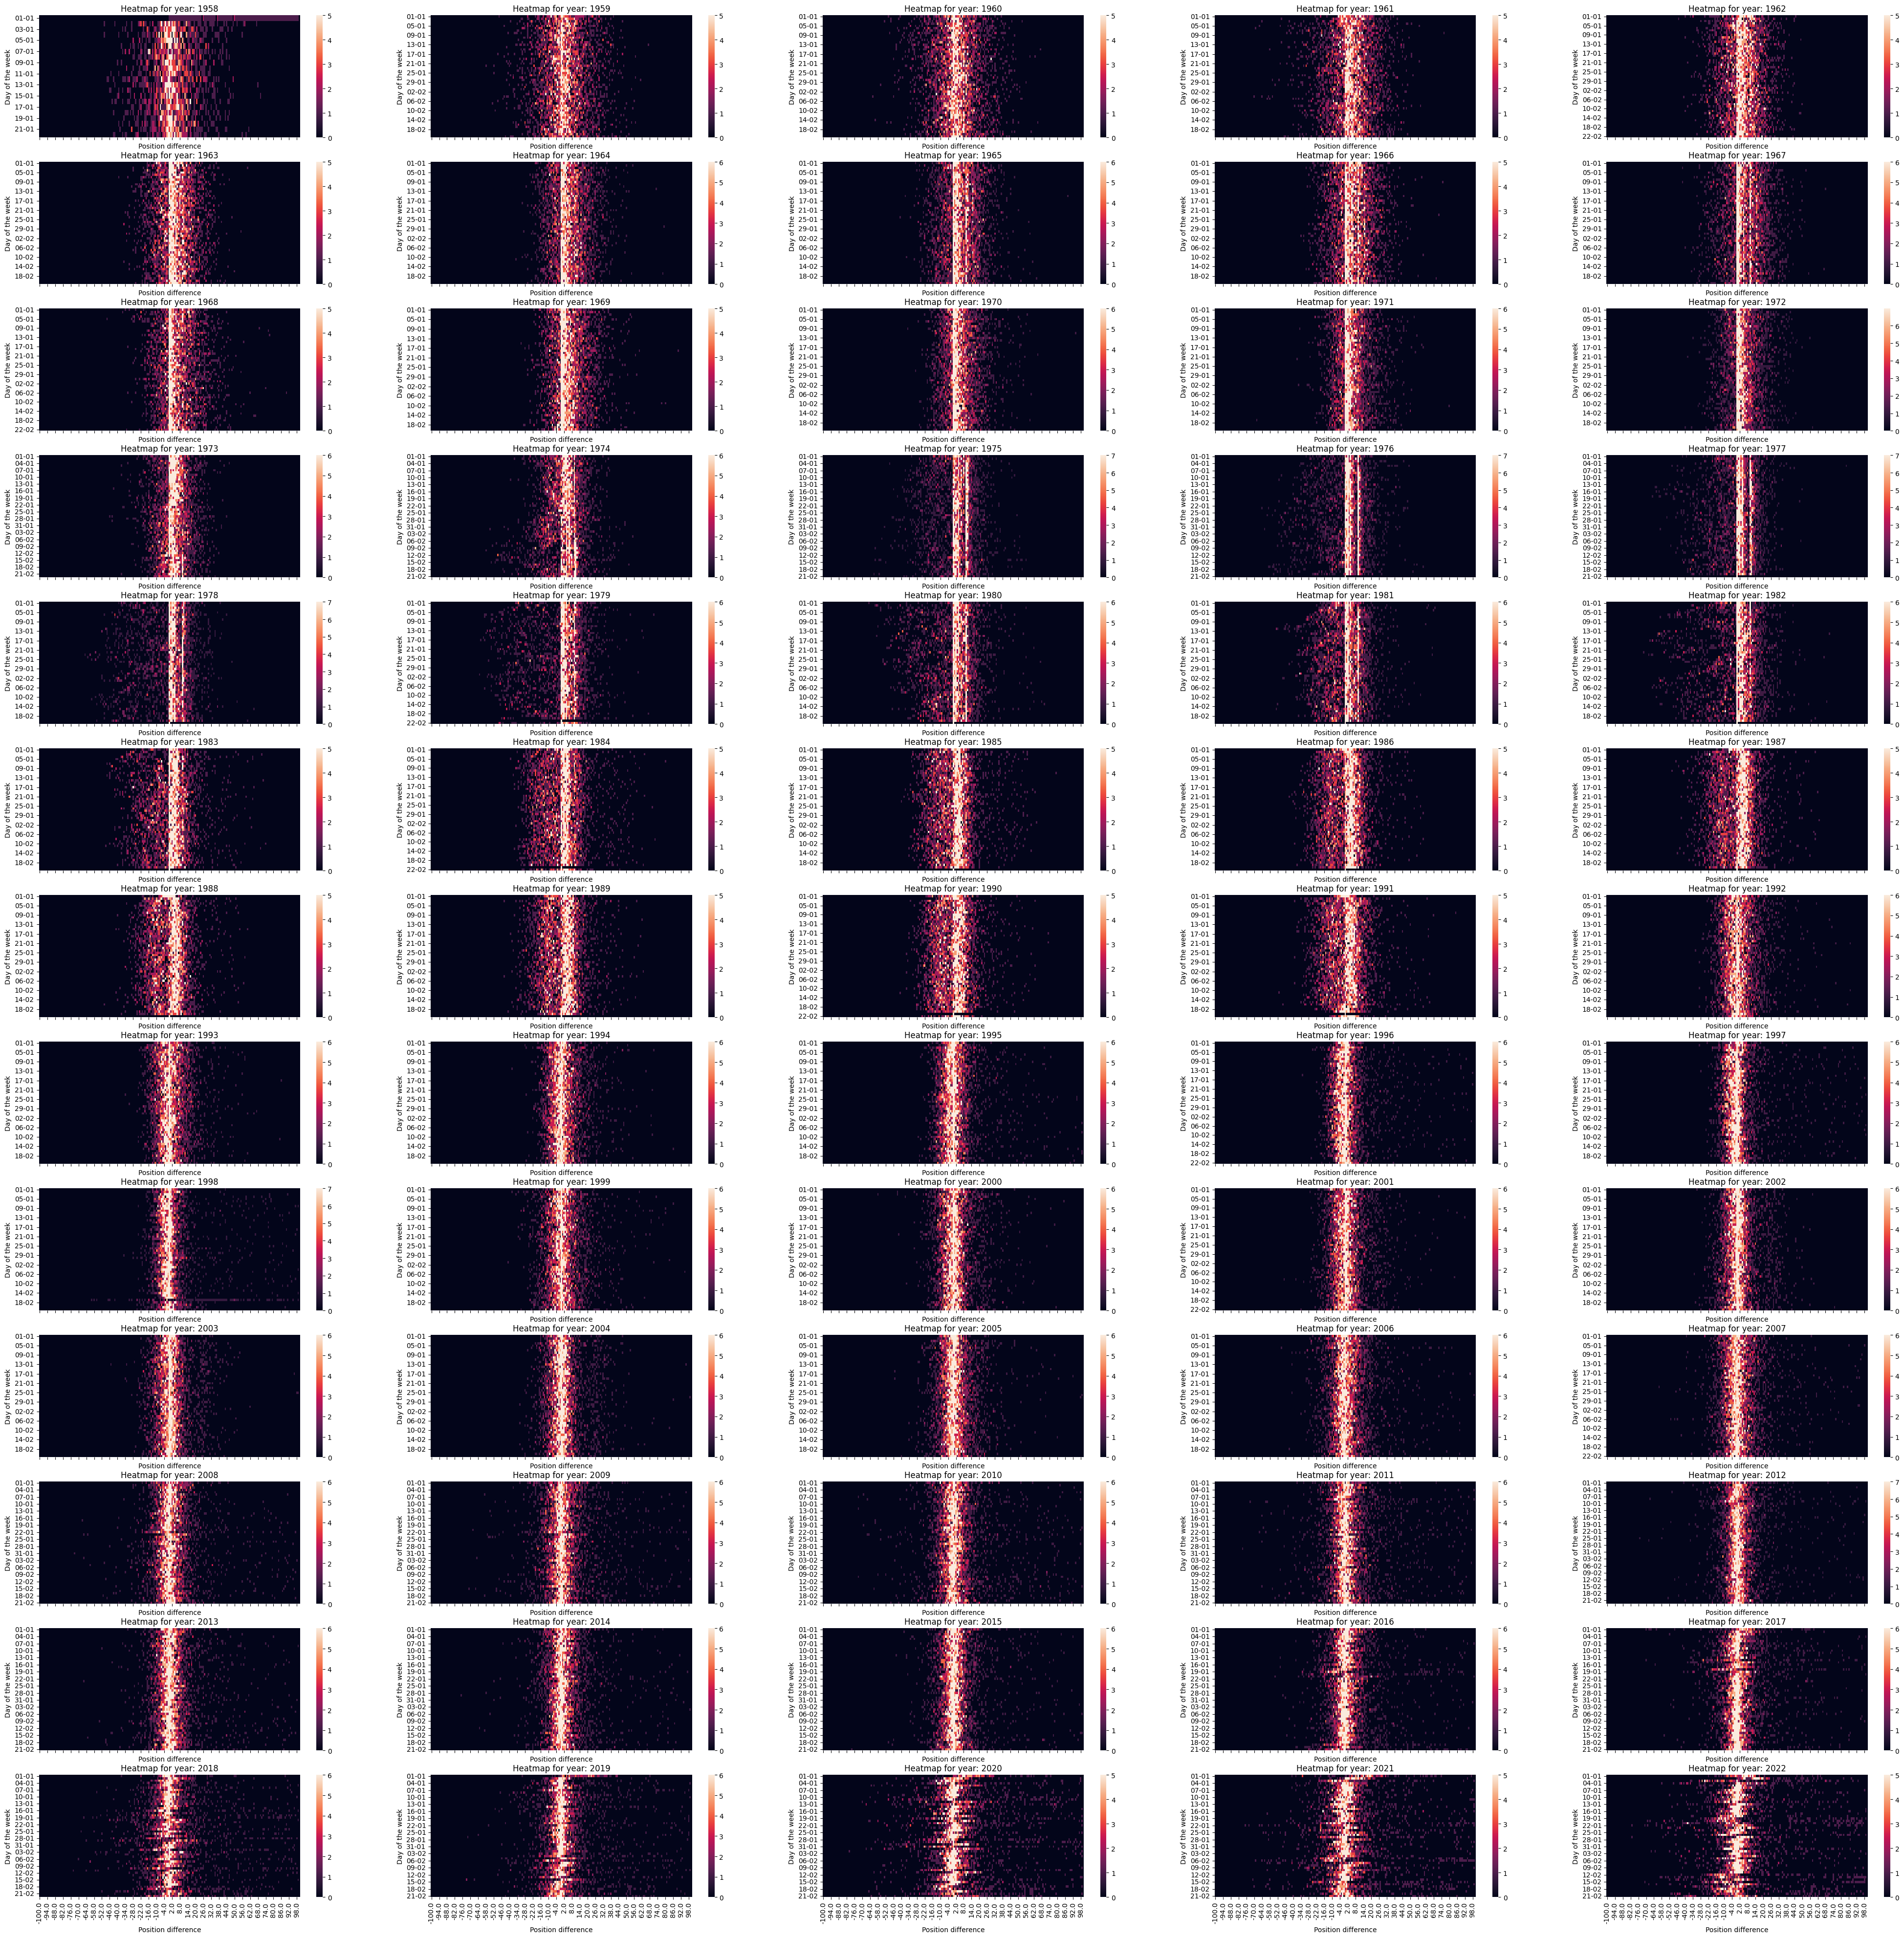

In [43]:
fig, axes = plt.subplots(13, 5, figsize=(50, 50), sharex=True)

row = 0
col = 0
date_form = DateFormatter("%d-%m")
billboard_subset = billboard_hot_100[["year", "first_day_of_the_week", "position_change"]]

for year in range(1958, 2023):
    billboard_year_subset = billboard_subset[billboard_subset["year"] == year]
    cross_tab = pd.crosstab(billboard_year_subset["first_day_of_the_week"], 
                            billboard_year_subset["position_change"])
    # adding the non existing values between -100 and 100 as columns with 0 values to present in the heatmap
    not_existing = []
    for i in range(-100, 101):
        if i not in cross_tab.columns:
            not_existing.append(i)
    not_existing_dict = dict.fromkeys(not_existing, 0)        
    temp_df = pd.DataFrame(not_existing_dict, index=cross_tab.index)
    cross_tab = pd.concat([cross_tab, temp_df], axis=1)
    cross_tab = cross_tab.reindex(sorted(cross_tab.columns), axis=1)

    billboard_year_subset = billboard_year_subset[["first_day_of_the_week", "position_change"]]
    billboard_year_subset.set_index("position_change", inplace=True)
    billboard_year_subset.sort_values(by="first_day_of_the_week", inplace=True)
    billboard_year_subset.sort_index(inplace=True, ascending=False)

    sns.heatmap(cross_tab, ax=axes[row, col], cmap=sns.color_palette("rocket", as_cmap=True), robust=True)
    axes[row, col].set_title(f"Heatmap for year: {year}")
    axes[row, col].set_xlabel("Position difference")
    axes[row, col].set_ylabel("Day of the week")
    axes[row, col].yaxis.set_major_formatter(date_form)

    col += 1
    if col == 5:
        col = 0
        row += 1

plt.xticks(rotation=90)
plt.savefig("figures/position_difference_heatmap.pdf", format="pdf")
plt.show()


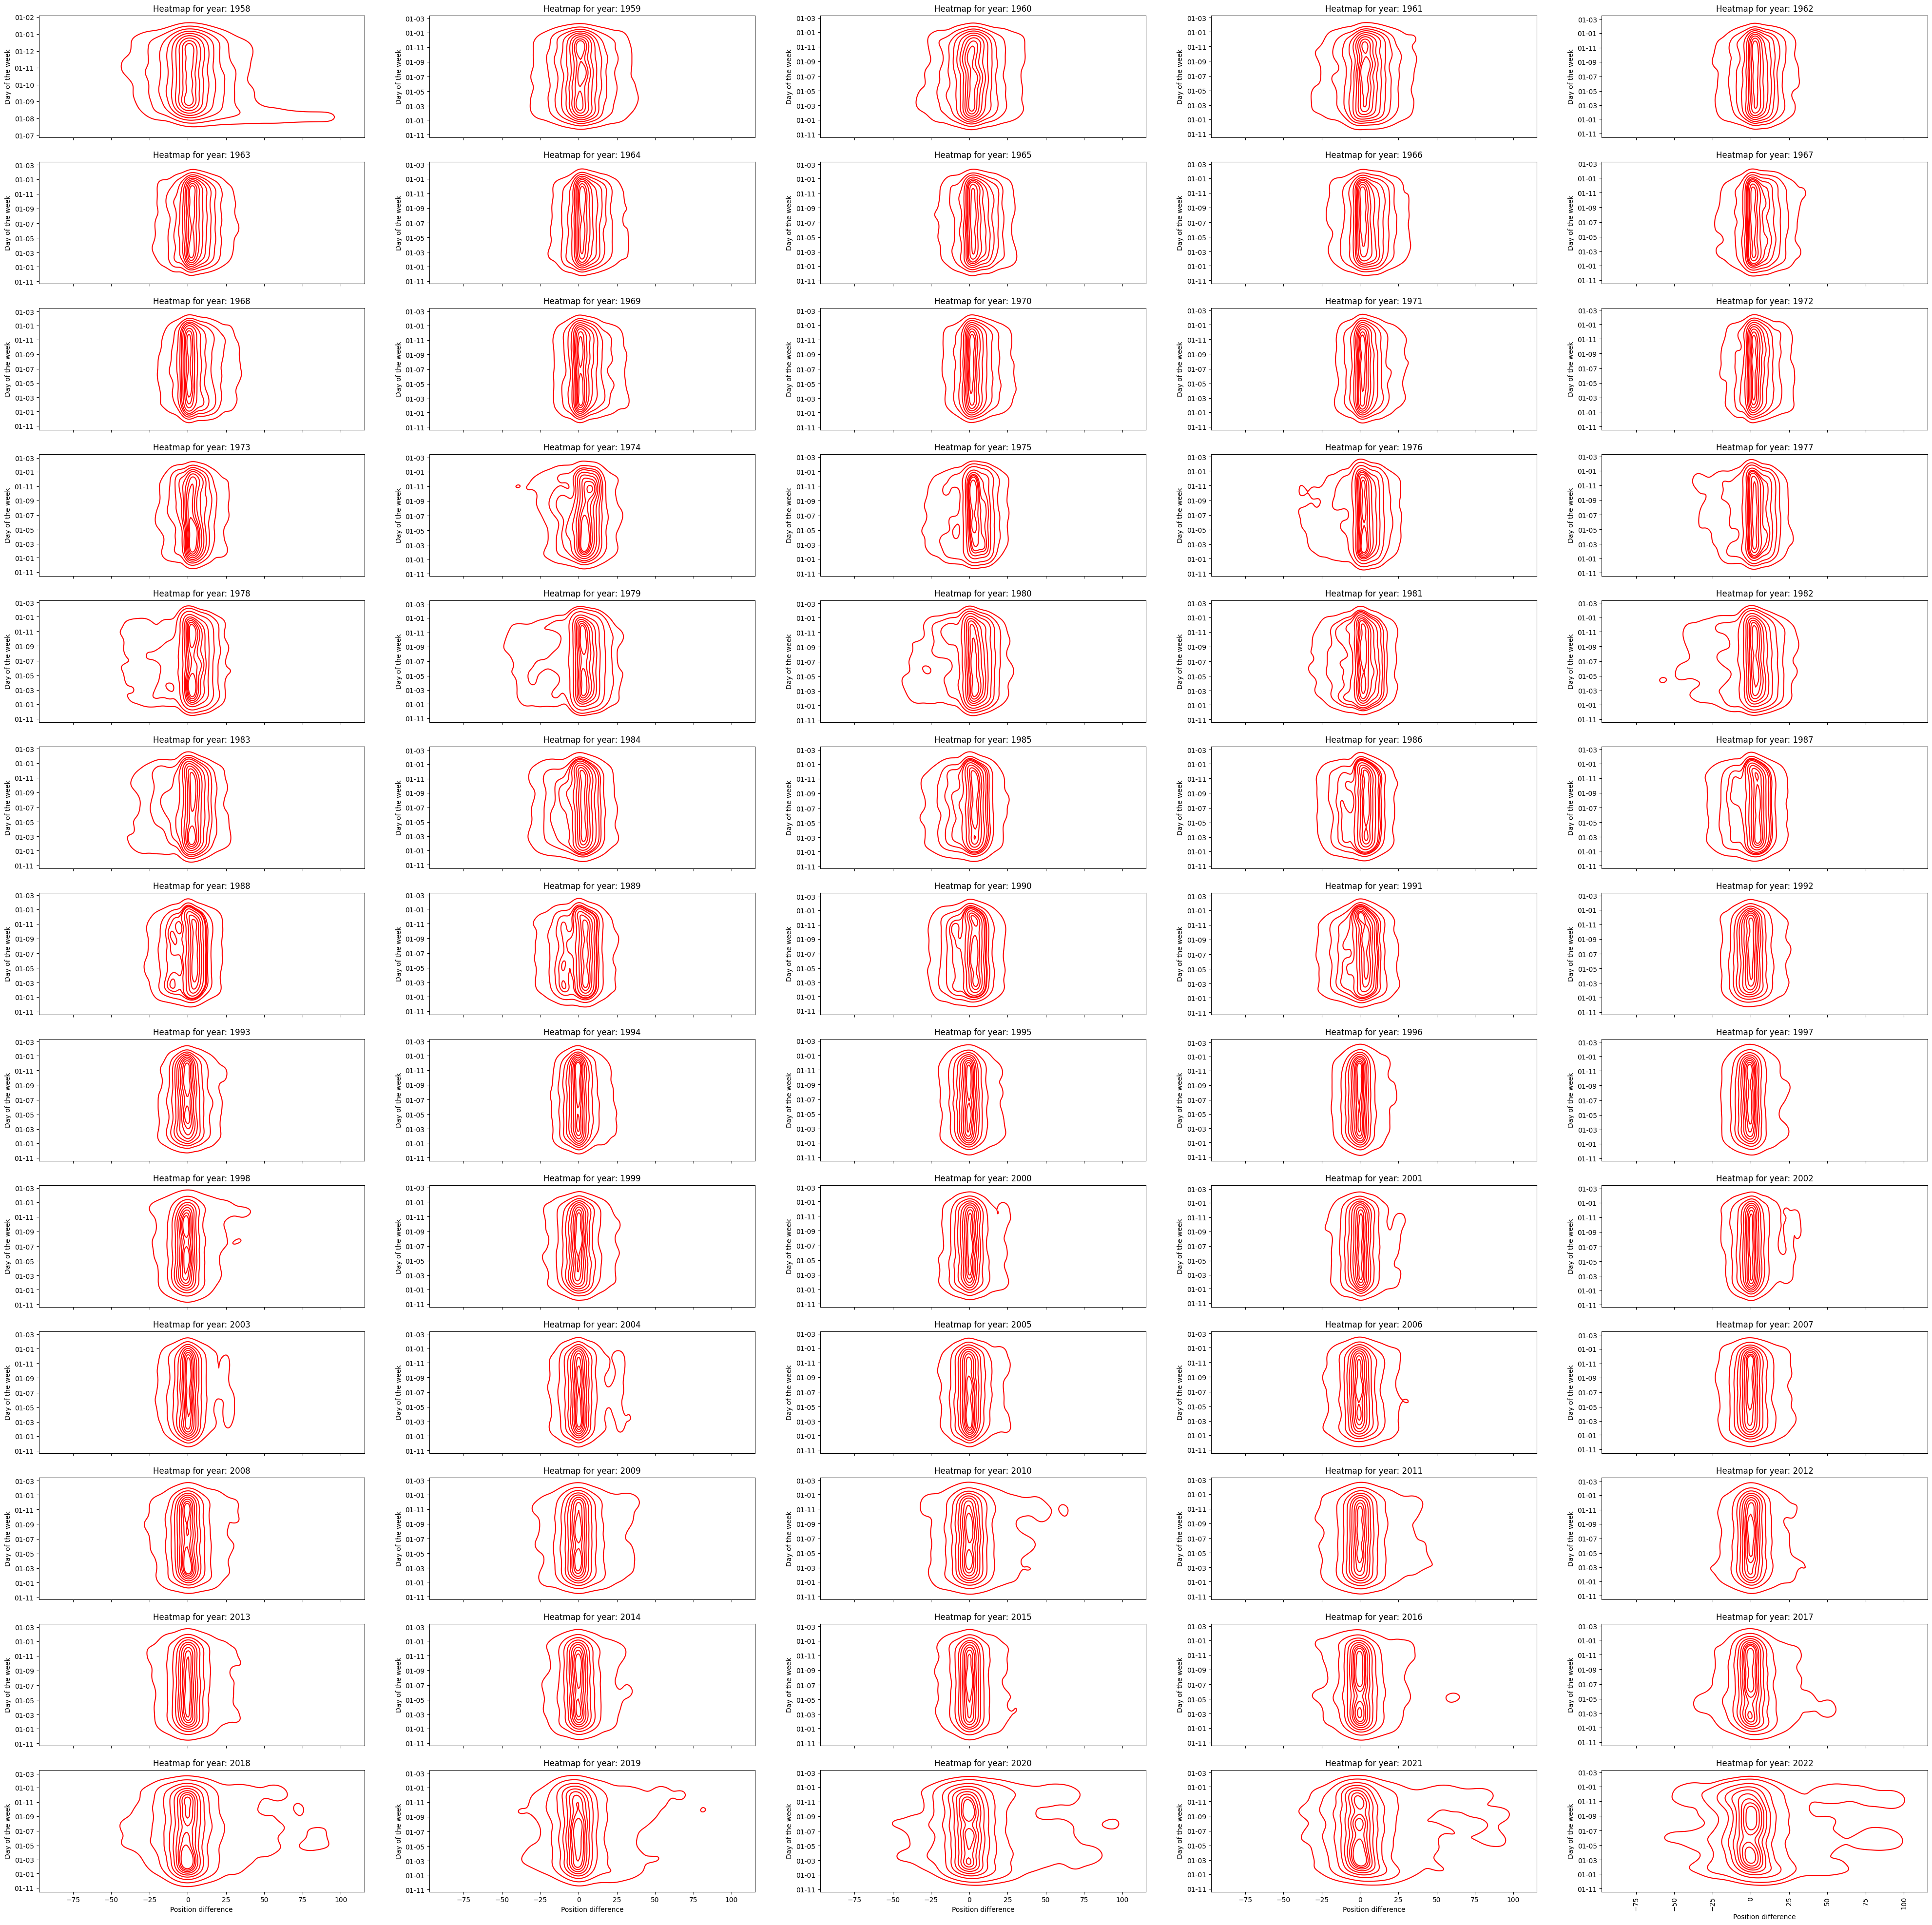

In [28]:
fig, axes = plt.subplots(13, 5, figsize=(50, 50), sharex=True)

row = 0
col = 0
date_form = DateFormatter("%d-%m")
billboard_subset = billboard_hot_100[["year", "first_day_of_the_week", "position_change"]]

for year in range(1958, 2023):
    billboard_year_subset = billboard_subset[billboard_subset["year"] == year]
    cross_tab = pd.crosstab(billboard_year_subset["first_day_of_the_week"], 
                            billboard_year_subset["position_change"])
    # adding the non existing values between -100 and 100 as columns with 0 values to present in the heatmap
    not_existing = []
    for i in range(-100, 101):
        if i not in cross_tab.columns:
            not_existing.append(i)
    not_existing_dict = dict.fromkeys(not_existing, 0)        
    temp_df = pd.DataFrame(not_existing_dict, index=cross_tab.index)
    cross_tab = pd.concat([cross_tab, temp_df], axis=1)
    cross_tab = cross_tab.reindex(sorted(cross_tab.columns), axis=1)

    sns.kdeplot(billboard_year_subset, x=billboard_year_subset["position_change"], y=billboard_year_subset["first_day_of_the_week"], ax=axes[row, col], color="red")
    axes[row, col].set_title(f"Heatmap for year: {year}")
    axes[row, col].set_xlabel("Position difference")
    axes[row, col].set_ylabel("Day of the week")
    axes[row, col].yaxis.set_major_formatter(date_form)

    col += 1
    if col == 5:
        col = 0
        row += 1

plt.xticks(rotation=90)
plt.savefig("figures/position_difference_contourmap.pdf", format="pdf")
plt.show()

## Best perfoming songs

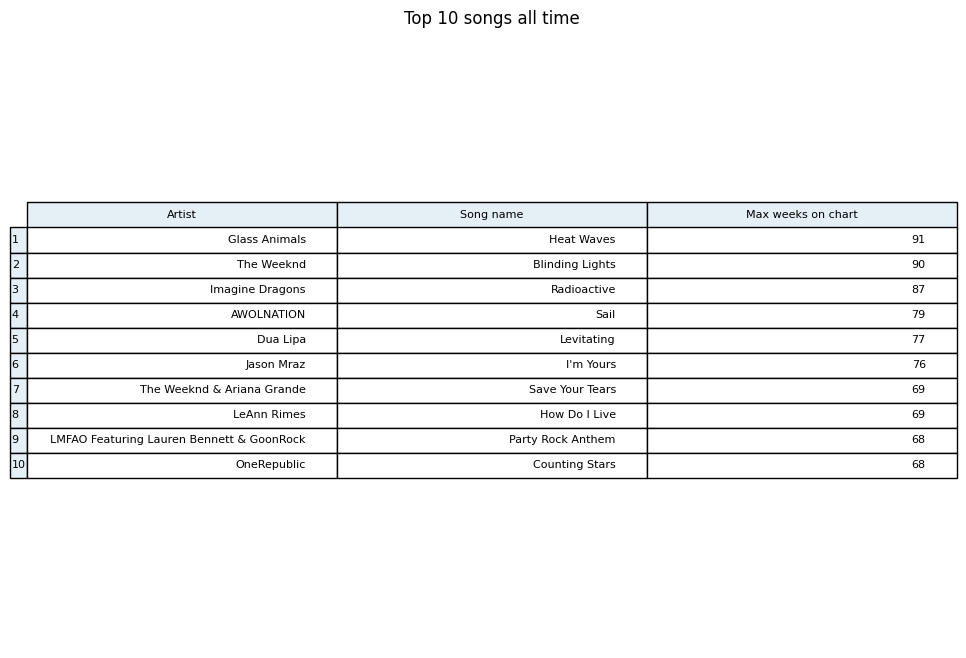

In [29]:
# Top 10 best berforming songs ever

max_weeks_on_chart = billboard_hot_100[["artist", "song_name", "weeks_on_chart"]].groupby(
    by=["artist", "song_name"]).max()
max_weeks_on_chart_sorted = max_weeks_on_chart.sort_values(by="weeks_on_chart", ascending=False).reset_index()

top_10_all_time = max_weeks_on_chart_sorted.head(10)

plt.figure(figsize=(12, 8))

# https://towardsdatascience.com/simple-little-tables-with-matplotlib-9780ef5d0bc4
rcolors = plt.cm.BuPu(np.full(10, 0.1))
ccolors = plt.cm.BuPu(np.full(10, 0.1))

table = plt.table(cellText=top_10_all_time.values,
                 rowColours=rcolors,
                 colColours=ccolors,
                 rowLabels=range(1, 11),
                 colLabels=["Artist", "Song name", "Max weeks on chart"],
                 loc = "center")
table.scale(1, 1.5)
plt.title("Top 10 songs all time")
plt.axis("off")

plt.savefig("figures/top_10_songs.pdf", format="pdf")
plt.show()

## Best performing songs before 2018

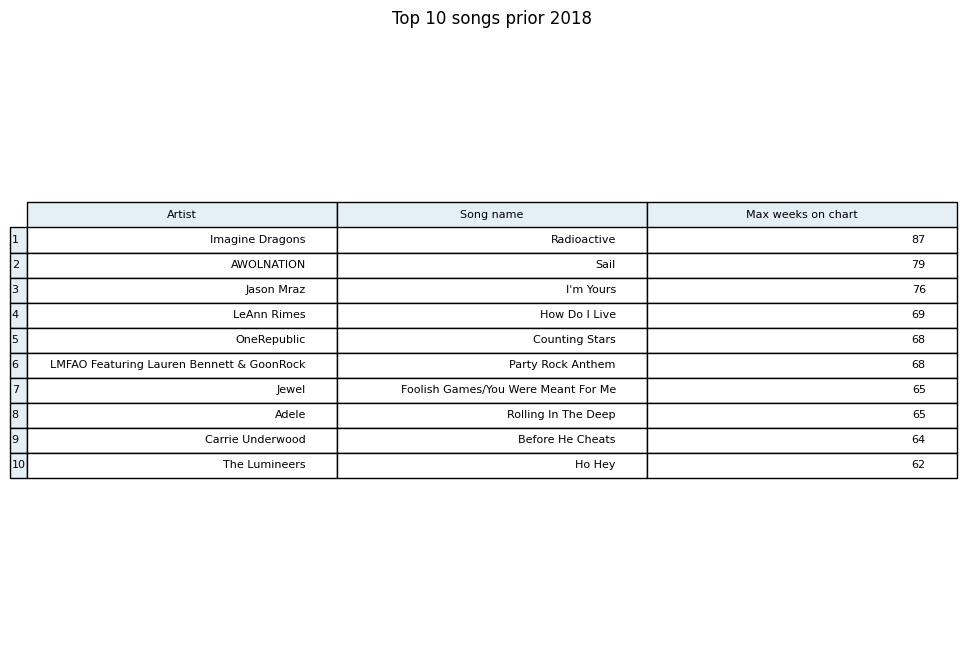

In [30]:
max_weeks_on_chart_prior_2018 = billboard_hot_100[billboard_hot_100["year"] < 2018][[
    "artist", "song_name", "weeks_on_chart"]].groupby(by=["artist", "song_name"]).max()
max_weeks_on_chart_prior_2018_sorted = max_weeks_on_chart_prior_2018.sort_values(
    by="weeks_on_chart", ascending=False).reset_index()

top_10_prior_2018 = max_weeks_on_chart_prior_2018_sorted.head(10)

plt.figure(figsize=(12, 8))
table = plt.table(cellText=top_10_prior_2018.values,
                 rowColours=rcolors,
                 colColours=ccolors,
                 rowLabels=range(1, 11),
                 colLabels=["Artist", "Song name", "Max weeks on chart"],
                 loc = "center")
table.scale(1, 1.5)
plt.title("Top 10 songs prior 2018")
plt.axis("off")

plt.savefig("figures/top_10_prior_2018.pdf", format="pdf")
plt.show()

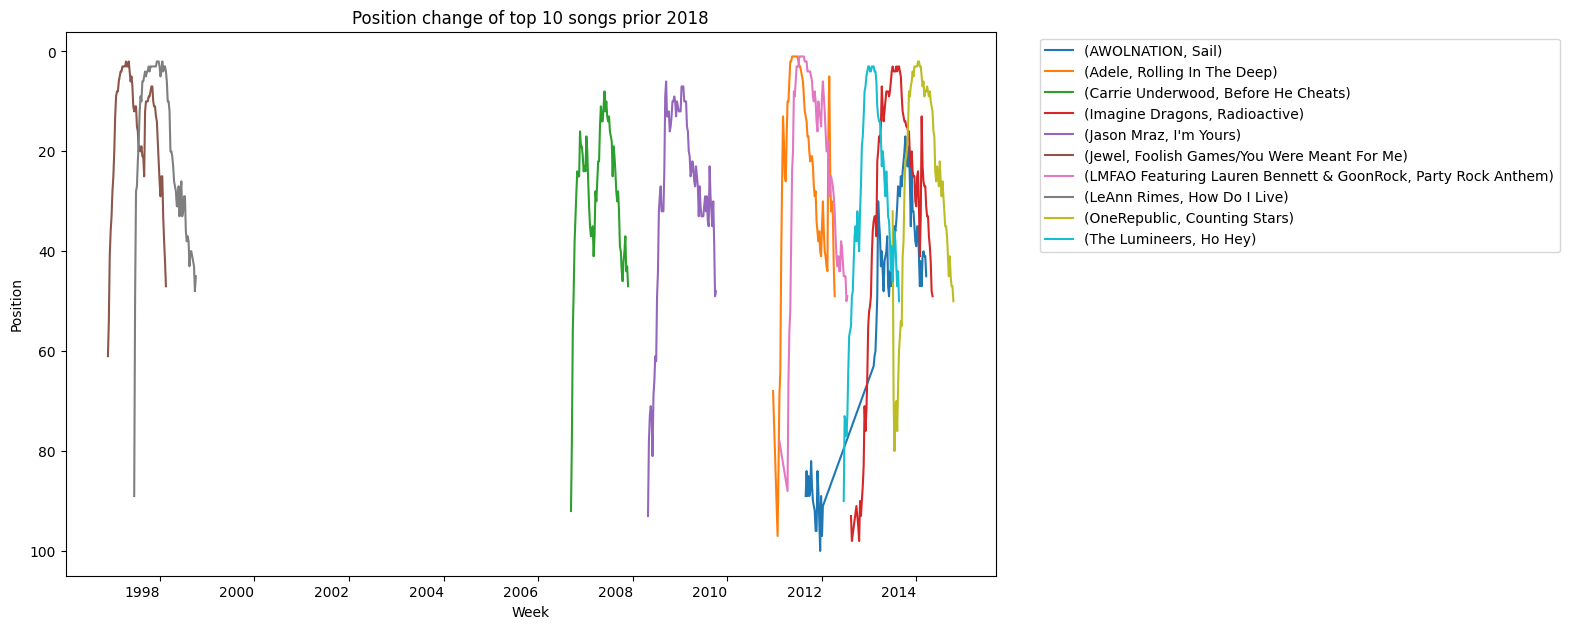

In [31]:
top_10_prior_2018_positions = billboard_hot_100[["artist", "song_name", "first_day_of_the_week", "position"]][
    billboard_hot_100["artist"].isin(top_10_prior_2018["artist"]) & \
    billboard_hot_100["song_name"].isin(top_10_prior_2018["song_name"])]

top_10_prior_2018_positions.set_index("first_day_of_the_week", inplace=True)

top_10_prior_2018_positions.groupby(by=["artist", "song_name"])["position"].plot(
    kind="line", figsize=(12, 8), legend=True, rot=0, )

plt.gca().invert_yaxis()
plt.title("Position change of top 10 songs prior 2018")
plt.xlabel("Week")
plt.ylabel("Position")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

plt.savefig("figures/top_10_prior_2018_positions.pdf", format="pdf")
plt.show()

## Best performing songs since 2018

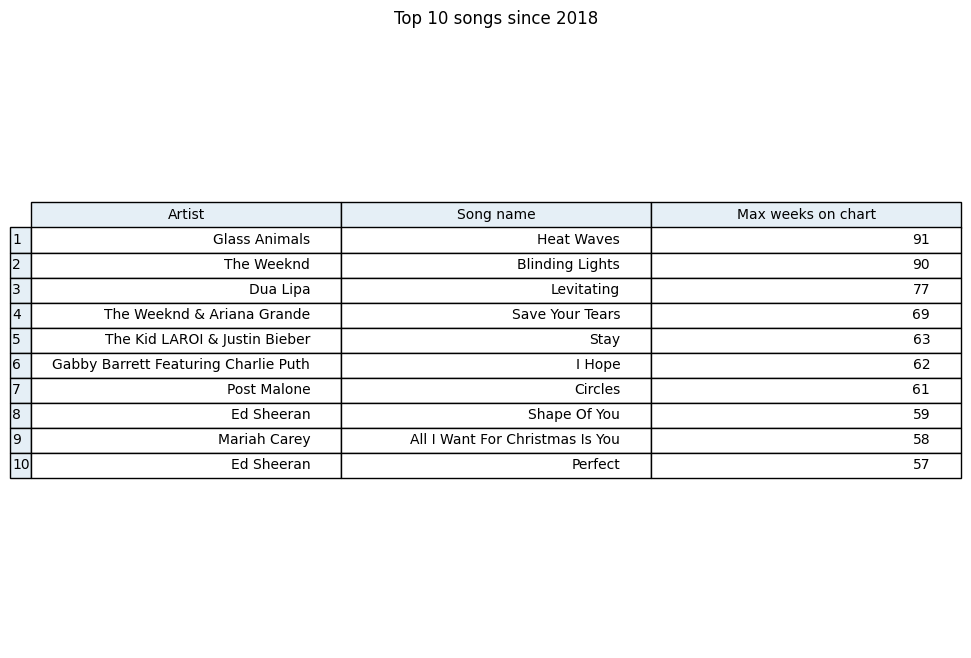

In [32]:
max_weeks_on_chart_after_2018 = billboard_hot_100[billboard_hot_100["year"] >= 2018][[
    "artist", "song_name", "weeks_on_chart"]].groupby(by=["artist", "song_name"]).max()
max_weeks_on_chart_after_2018_sorted = max_weeks_on_chart_after_2018.sort_values(
    by="weeks_on_chart", ascending=False).reset_index()

top_10_after_2018 = max_weeks_on_chart_after_2018_sorted.head(10)

plt.figure(figsize=(12, 8))
table = plt.table(cellText=top_10_after_2018.values,
                 rowColours=rcolors,
                 colColours=ccolors,
                 rowLabels=range(1, 11),
                 colLabels=["Artist", "Song name", "Max weeks on chart"],
                 loc = "center")
table.scale(1, 1.5)
plt.title("Top 10 songs since 2018")
plt.axis("off")

plt.savefig("figures/top_10_since_2018.pdf", format="pdf")
plt.show()

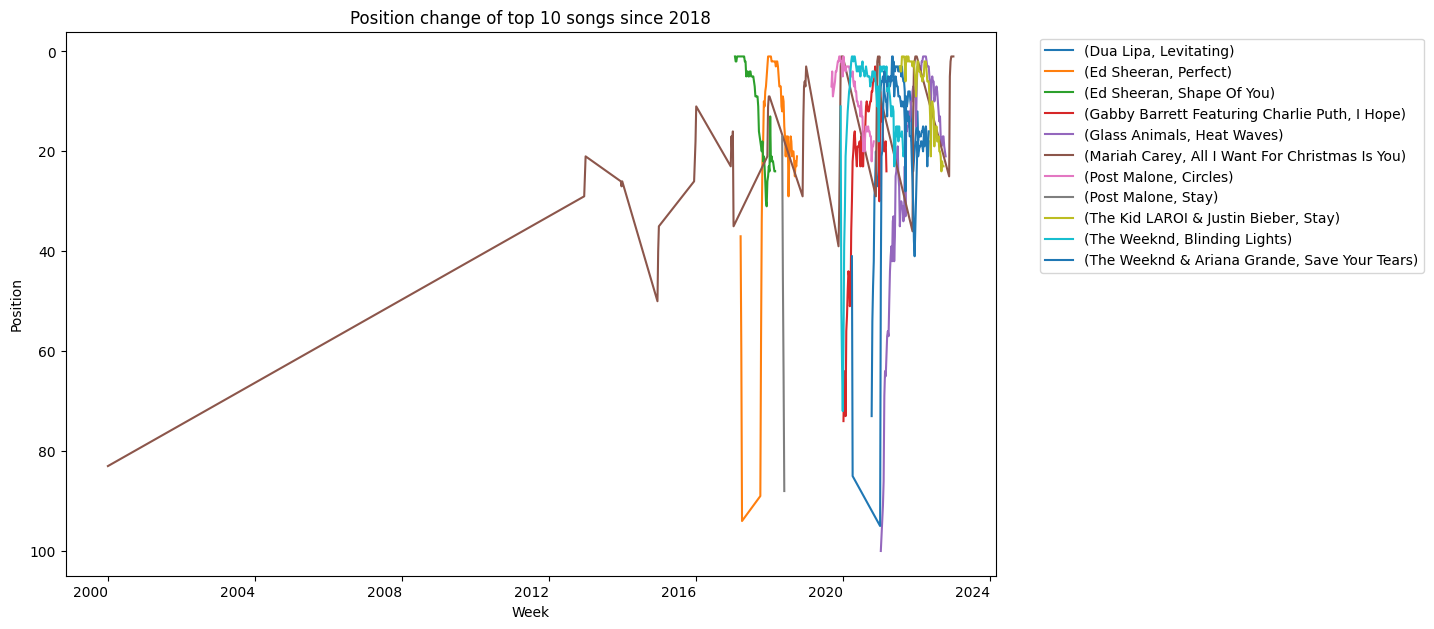

<Figure size 640x480 with 0 Axes>

In [33]:
top_10_after_2018_positions = billboard_hot_100[["artist", "song_name", "first_day_of_the_week", "position"]][
    billboard_hot_100["artist"].isin(top_10_after_2018["artist"]) & \
    billboard_hot_100["song_name"].isin(top_10_after_2018["song_name"])]

top_10_after_2018_positions.set_index("first_day_of_the_week", inplace=True)

top_10_after_2018_positions.groupby(by=["artist", "song_name"])["position"].plot(
    kind="line", figsize=(12, 8), legend=True, rot=0, )

plt.gca().invert_yaxis()
plt.title("Position change of top 10 songs since 2018")
plt.xlabel("Week")
plt.ylabel("Position")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()
plt.savefig("figures/top_10_since_2018_positions.pdf", format="pdf")

## Best songwriters based on the number of songs on the charts

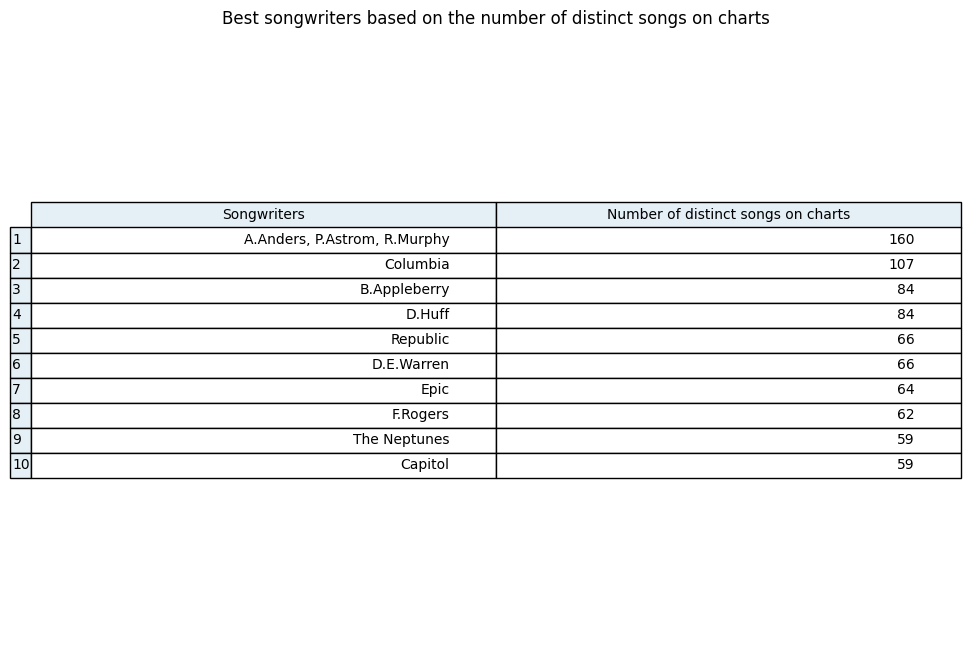

<Figure size 640x480 with 0 Axes>

In [34]:
songs_with_songwriters = billboard_hot_100[billboard_hot_100["songwriters"] != "Not Listed"]

songwriters_songs_count = songs_with_songwriters.groupby(by=["songwriters", "artist", "song_name"]).size().groupby(
    by="songwriters").count().sort_values(ascending=False).reset_index(name="songs_count")

best_songwriters = songwriters_songs_count.head(10)

plt.figure(figsize=(12, 8))
table = plt.table(cellText=best_songwriters.values,
                 rowColours=rcolors,
                 colColours=ccolors,
                 rowLabels=range(1, 11),
                 colLabels=["Songwriters", "Number of distinct songs on charts"],
                 loc = "center")
table.scale(1, 1.5)
plt.title("Best songwriters based on the number of distinct songs on charts")
plt.axis("off")
plt.show()
plt.savefig("figures/best_songwriters_songs.pdf", format="pdf")

## Best songwriters based on the number of distinct artists that make it to the charts

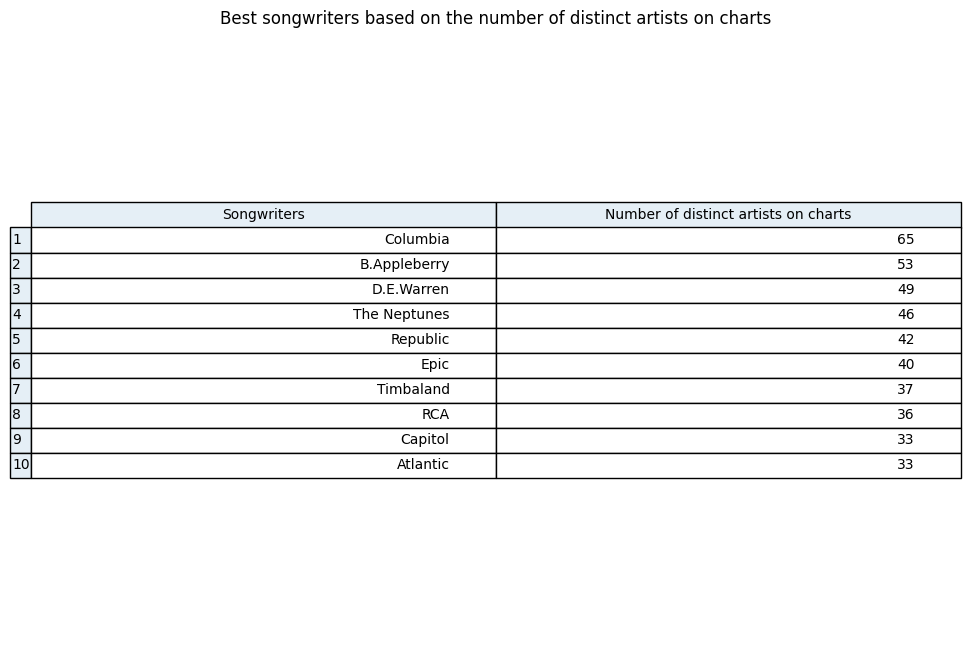

<Figure size 640x480 with 0 Axes>

In [35]:
songwriters_artists_count = songs_with_songwriters.groupby(by=["songwriters", "artist"]).size().groupby(
    by="songwriters").count().sort_values(ascending=False).reset_index(name="songs_count")

best_songwriters_artists = songwriters_artists_count.head(10)

plt.figure(figsize=(12, 8))
table = plt.table(cellText=best_songwriters_artists.values,
                 rowColours=rcolors,
                 colColours=ccolors,
                 rowLabels=range(1, 11),
                 colLabels=["Songwriters", "Number of distinct artists on charts"],
                 loc = "center")
table.scale(1, 1.5)
plt.title("Best songwriters based on the number of distinct artists on charts")
plt.axis("off")
plt.show()
plt.savefig("figures/best_songwriters_artists.pdf", format="pdf")